###
DESCRIPTION AND ROADMAP OF THE PROJECT

In this project, I will compare the performance of two machine learning algorithms: k-Nearest Neighbours (k-NN) and Random Forest. The dataset has 1400 samples with 25 features each. The first column is the sample ID, the second column is the label (with five possible values) and the rest are the characteristics.
In order to obtain a better result and to understand the available data better, an exploratory data analysis and the application of unsupervised learning methods are carried out. Finally, the implementation of a neural network is useful to make a comparison with a more complex model.


- 0. LIBRARIES

- 1. OPENING THE DATASET

- 2. EXPLORATORY DATA ANALYSIS
            
     - 2.1 DATA TYPE AND MISSING VALUES CHECK

     - 2.2 COMPUTATION AND VISUALIZATION OF MEAN, STD, QUANTILES, MAX, MIN, CORRELATION MATRIX

     - 2.3 ADDITIONAL CHECK TO SEE IF DATA IS NORMALIZED

     - CHECK IF CLASSES ARE BALANCED
             
- 3. UNSUPERVISED LEARNING METHODS

- 4. CLASSIFIERS
            
     - 4.1 RANDOM FOREST
                        
          - 4.1.1 SIMPLE RANDOM FOREST

          - 4.1.2 RANDOM FOREST WITH GRID SEARCH

          - 4.1.3 RANDOM FOREST WITH RANDOM SEARCH

          - 4.1.4 RANDOM FOREST WITH BAYESIAN SEARCH
                        
          - 4.1.5 RANDOM FOREST MODEL SELECTION
            
      - 4.2 KNN
                        
           - 4.2.1 SIMPLE KNN

           - 4.2.2 KNN WITH GRID SEARCH

           - 4.2.3 KNN WITH RANDOM SEARCH

           - 4.2.4 KNN WITH BAYESIAN SEARCH

           - 4.2.5 KNN MODEL SELECTION

      - 4.3 FINAL MODEL SELECTION

       - 4.4 NEURAL NETWORK (EXTRA TOPIC)

- 5. PREDICTIONS

- 6. CONCLUSIONS
            




##
0. LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score,StratifiedKFold, train_test_split,LeaveOneOut, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

import itertools

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim


##
1. OPENING THE DATASET

I start opening the dataset with the read_csv method in order to get a dataframe. I use as the index the sample id column.


In [3]:
df = pd.read_csv('mldata_0003195463/mldata_0003195463.csv', index_col=0)
df

label  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         0   0.880273   0.442573  -2.032819  -0.576659  -4.358051   2.376050   
1         1   1.313825  -1.949632   1.070599   1.394479  -0.059726  -2.975673   
2         0  -1.009061  -0.301009   5.641678  -0.921311  -2.646763  -1.947697   
3         0  -0.239631   3.031876  -1.614844  -1.091440  -0.776343   0.390649   
4         3   2.612405   0.535401  -0.396174   0.251268   4.729981   1.030001   
...     ...        ...        ...        ...        ...        ...        ...   
1395      4   1.658674  -2.182582   1.361128  -0.223131   1.381046   1.378637   
1396      3   1.343677  -0.084420  -0.678494   1.063410   2.486721   2.675759   
1397      0  -1.199296   4.393630   0.087376  -0.706097   2.294865  -0.709506   
1398      3   0.444458  -5.569485  -2.959195  -0.197783  -1.033010  -0.518803   
1399      4  -0.160659   1.186228  -1.238557  -1.203545   0.084697  -0.178147   

      feature_7  feature_8  feature_9  ...  feature_16  feature_17  \
0      0.878844   0.880273  -1.874594  ...    5.111025   -3.170193   
1      3.306127   1.313825   4.609667  ...   -4.540766   -4.718089   
2     -0.578194  -1.009061   1.917913  ...    0.663454    0.724729   
3     -0.113804  -0.239631  -2.506136  ...    5.037567    0.179098   
4     -2.412348   2.612405   3.542474  ...   -2.521146   -0.048739   
...         ...        ...        ...  ...         ...         ...   
1395   1.010512   1.658674   0.911761  ...   -3.797807    1.035576   
1396   0.063485   1.343677   6.019151  ...    2.674485    2.995162   
1397  -1.220693  -1.199296   0.552521  ...   -0.104632    3.663284   
1398   3.340311   0.444458   0.795092  ...    3.725220   -2.332213   
1399   0.750582  -0.160659  -0.904650  ...    4.180642    0.364106   

      feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0      -1.846344    6.816500   -0.325096    0.356847    0.267963    0.128522   
1      -0.490495    3.271247    0.120484    0.388111    0.166516    1.187520   
2       0.229717    2.032490    0.905951    0.175052   -2.693749   -3.747243   
3      -1.320429    3.930034    0.073331   -1.778206   -0.786323   -2.204570   
4      -0.010981   -6.330675    1.710562   -0.306278    0.112979    2.182430   
...          ...         ...         ...         ...         ...         ...   
1395    3.116603   -3.478307   -2.576972    1.423271   -0.985356   -1.662373   
1396   -0.128158   -3.063000   -3.342745   -1.010822   -1.358623    1.126761   
1397    0.118288    6.718347    3.372529   -0.066236   -0.165354   -0.497060   
1398    0.650232    5.851846    6.574953    1.820581   -0.218203    0.403429   
1399    1.047320    0.269967   -0.071741    0.273339   -1.399230   -2.708364   

      feature_24  feature_25  
0       4.710026    2.439719  
1      -4.999382    2.578916  
2       5.988060    2.321502  
3       5.601020   -0.230172  
4      -4.726831   -1.039056  
...          ...         ...  
1395    0.367540    1.185928  
1396   -5.258127   -0.244412  
1397    8.260052    5.352153  
1398   -3.459758    0.700423  
1399    0.516151   -1.190896  

[1400 rows x 26 columns]

I separate the dataset into two datasets: one containing all the features and data points, while the second containing the labels for each data point. The separation will be incredibly useful during the training of the model.

In [4]:
df_data_points = df.iloc[:, 1:]
df_data_points

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.880273   0.442573  -2.032819  -0.576659  -4.358051   2.376050   
1      1.313825  -1.949632   1.070599   1.394479  -0.059726  -2.975673   
2     -1.009061  -0.301009   5.641678  -0.921311  -2.646763  -1.947697   
3     -0.239631   3.031876  -1.614844  -1.091440  -0.776343   0.390649   
4      2.612405   0.535401  -0.396174   0.251268   4.729981   1.030001   
...         ...        ...        ...        ...        ...        ...   
1395   1.658674  -2.182582   1.361128  -0.223131   1.381046   1.378637   
1396   1.343677  -0.084420  -0.678494   1.063410   2.486721   2.675759   
1397  -1.199296   4.393630   0.087376  -0.706097   2.294865  -0.709506   
1398   0.444458  -5.569485  -2.959195  -0.197783  -1.033010  -0.518803   
1399  -0.160659   1.186228  -1.238557  -1.203545   0.084697  -0.178147   

      feature_7  feature_8  feature_9  feature_10  ...  feature_16  \
0      0.878844   0.880273  -1.874594    0.244483  ...    5.111025   
1      3.306127   1.313825   4.609667    0.376011  ...   -4.540766   
2     -0.578194  -1.009061   1.917913   -0.108523  ...    0.663454   
3     -0.113804  -0.239631  -2.506136    0.492805  ...    5.037567   
4     -2.412348   2.612405   3.542474    1.402761  ...   -2.521146   
...         ...        ...        ...         ...  ...         ...   
1395   1.010512   1.658674   0.911761    0.310275  ...   -3.797807   
1396   0.063485   1.343677   6.019151    1.785352  ...    2.674485   
1397  -1.220693  -1.199296   0.552521    0.732084  ...   -0.104632   
1398   3.340311   0.444458   0.795092    0.008757  ...    3.725220   
1399   0.750582  -0.160659  -0.904650    0.409299  ...    4.180642   

      feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  \
0      -3.170193   -1.846344    6.816500   -0.325096    0.356847    0.267963   
1      -4.718089   -0.490495    3.271247    0.120484    0.388111    0.166516   
2       0.724729    0.229717    2.032490    0.905951    0.175052   -2.693749   
3       0.179098   -1.320429    3.930034    0.073331   -1.778206   -0.786323   
4      -0.048739   -0.010981   -6.330675    1.710562   -0.306278    0.112979   
...          ...         ...         ...         ...         ...         ...   
1395    1.035576    3.116603   -3.478307   -2.576972    1.423271   -0.985356   
1396    2.995162   -0.128158   -3.063000   -3.342745   -1.010822   -1.358623   
1397    3.663284    0.118288    6.718347    3.372529   -0.066236   -0.165354   
1398   -2.332213    0.650232    5.851846    6.574953    1.820581   -0.218203   
1399    0.364106    1.047320    0.269967   -0.071741    0.273339   -1.399230   

      feature_23  feature_24  feature_25  
0       0.128522    4.710026    2.439719  
1       1.187520   -4.999382    2.578916  
2      -3.747243    5.988060    2.321502  
3      -2.204570    5.601020   -0.230172  
4       2.182430   -4.726831   -1.039056  
...          ...         ...         ...  
1395   -1.662373    0.367540    1.185928  
1396    1.126761   -5.258127   -0.244412  
1397   -0.497060    8.260052    5.352153  
1398    0.403429   -3.459758    0.700423  
1399   -2.708364    0.516151   -1.190896  

[1400 rows x 25 columns]

In [5]:
df_data_points.shape # as pointed out in the instructions the dataset (excluded labels) is made of 25 features and 1400 data points 

(1400, 25)

In [6]:
df_labels = df.iloc[:, 0]
df_labels

0       0
1       1
2       0
3       0
4       3
       ..
1395    4
1396    3
1397    0
1398    3
1399    4
Name: label, Length: 1400, dtype: int64

The transpose dataset of samples and of labels are instead the following

In [7]:
df_data_points_tr = df_data_points.T
df_data_points_tr

0         1         2         3         4         5     \
feature_1   0.880273  1.313825 -1.009061 -0.239631  2.612405  0.037314   
feature_2   0.442573 -1.949632 -0.301009  3.031876  0.535401 -0.206636   
feature_3  -2.032819  1.070599  5.641678 -1.614844 -0.396174  3.805659   
feature_4  -0.576659  1.394479 -0.921311 -1.091440  0.251268 -1.248468   
feature_5  -4.358051 -0.059726 -2.646763 -0.776343  4.729981 -2.630187   
feature_6   2.376050 -2.975673 -1.947697  0.390649  1.030001 -3.808977   
feature_7   0.878844  3.306127 -0.578194 -0.113804 -2.412348 -1.709104   
feature_8   0.880273  1.313825 -1.009061 -0.239631  2.612405  0.037314   
feature_9  -1.874594  4.609667  1.917913 -2.506136  3.542474 -1.901907   
feature_10  0.244483  0.376011 -0.108523  0.492805  1.402761  0.205311   
feature_11 -0.568563 -0.642429  0.631918  0.123358  2.102372  1.804765   
feature_12 -3.958259  0.527434 -0.905757 -2.559503  1.169881 -0.072967   
feature_13  0.846233  2.406618  1.901215  0.814844 -1.005312  0.698838   
feature_14  7.906497  1.275940 -3.975294  2.398946 -0.229136 -6.634834   
feature_15  0.835684  1.206942  0.301467  0.399737  0.584454  0.864146   
feature_16  5.111025 -4.540766  0.663454  5.037567 -2.521146 -3.521657   
feature_17 -3.170193 -4.718089  0.724729  0.179098 -0.048739  0.117485   
feature_18 -1.846344 -0.490495  0.229717 -1.320429 -0.010981 -1.109924   
feature_19  6.816500  3.271247  2.032490  3.930034 -6.330675  4.948475   
feature_20 -0.325096  0.120484  0.905951  0.073331  1.710562  2.633378   
feature_21  0.356847  0.388111  0.175052 -1.778206 -0.306278  1.346645   
feature_22  0.267963  0.166516 -2.693749 -0.786323  0.112979 -0.104546   
feature_23  0.128522  1.187520 -3.747243 -2.204570  2.182430 -0.415033   
feature_24  4.710026 -4.999382  5.988060  5.601020 -4.726831  9.718475   
feature_25  2.439719  2.578916  2.321502 -0.230172 -1.039056  1.988640   

                6         7         8         9     ...      1390      1391  \
feature_1   2.010636  1.986206  0.006886 -4.488281  ... -0.820145 -1.729645   
feature_2   0.621676  4.117393 -0.548541  0.012253  ... -0.837771 -0.531008   
feature_3  -5.766030 -2.116423 -1.114819  0.168275  ...  3.147020  3.084188   
feature_4  -0.060257 -1.030494 -1.044195  0.713612  ...  1.044003 -0.132301   
feature_5  -2.617304  1.891215  0.281889  0.010156  ... -1.181065  1.801259   
feature_6  -2.106621  1.333070 -0.888954  1.291766  ... -0.374998 -0.245327   
feature_7  -1.109602  0.912973  2.562891 -3.332946  ... -0.040821 -1.421910   
feature_8   2.010636  1.986206  0.006886 -4.488281  ... -0.820145 -1.729645   
feature_9   4.176352 -0.352365  3.993937  1.284281  ...  0.234835  3.096202   
feature_10 -1.246551 -0.286358 -0.215466  0.141398  ...  0.040927 -3.070705   
feature_11  1.085559 -3.084630 -2.913143 -1.486520  ... -0.726145 -0.587255   
feature_12  2.088462  0.505836 -0.547933  0.655720  ...  1.250022  1.936665   
feature_13 -0.779006  1.718272 -0.721186 -0.566567  ... -0.519731  0.077736   
feature_14 -2.048398  2.433992  1.326202 -1.058776  ... -6.728930 -1.992863   
feature_15  1.552834  0.685178  0.373199  0.245434  ...  0.176876 -0.351053   
feature_16  0.749332 -0.438854  2.135337  4.407460  ... -0.142716 -1.753790   
feature_17 -0.813414  0.704341 -2.462587  1.933163  ...  5.272173  0.910549   
feature_18 -1.336012  0.464369  0.758567 -0.225195  ... -0.855814  1.083912   
feature_19  2.291858 -1.472067  0.506498 -5.468823  ... -1.680982 -2.708883   
feature_20 -4.093771 -1.642073  0.468107 -2.921080  ...  0.477611  0.881359   
feature_21  0.430862  0.550580 -0.063203 -0.045571  ...  0.076906 -1.118559   
feature_22 -1.004232 -0.073920 -0.658809  1.797368  ...  0.361732  1.181771   
feature_23 -1.703285  0.336433  0.068914 -3.230154  ... -0.143410 -1.786970   
feature_24  0.445922 -1.713812 -7.775547 -0.546823  ...  0.489176  0.156532   
feature_25 -3.537702 -0.325273  0.068403 -1.991403  ... -0.214643  3.283793   

                1392      1393      

In [8]:
labels_t = df_labels.T
labels_t

0       0
1       1
2       0
3       0
4       3
       ..
1395    4
1396    3
1397    0
1398    3
1399    4
Name: label, Length: 1400, dtype: int64

##
2. EXPLORATORY DATA ANALYSIS 

I now start to perform the exploratory data analysis on my dataset in order to better understand the data itself, see if there are special patterns and look for the distribution

###
2.1 DATA TYPE AND MISSING VALUES CHECK

I start check if I have all valid values in the dataset and if all of them are integers/floats (as should be according to the instructions)

In [9]:
print("Data Types:\n", df_data_points.dtypes)

Data Types:
 feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
dtype: object


In [10]:
print("Features with Nan values:\n", df_data_points.isna().any())

Features with Nan values:
 feature_1     False
feature_2     False
feature_3     False
feature_4     False
feature_5     False
feature_6     False
feature_7     False
feature_8     False
feature_9     False
feature_10    False
feature_11    False
feature_12    False
feature_13    False
feature_14    False
feature_15    False
feature_16    False
feature_17    False
feature_18    False
feature_19    False
feature_20    False
feature_21    False
feature_22    False
feature_23    False
feature_24    False
feature_25    False
dtype: bool


As it is possible to notice from the previous checks, I have all valid values in my dataset and more precisely all of them are float.

###
2.2 COMPUTATION AND VISUALIZATION OF MEAN, STD, QUANTILES, MAX, MIN, CORRELATION MATRIX

Now I want to compute and represent graphically the mean, std, quantiles, of the data points across their 25 features.
In order to do so, I use the transposed of the dataset.

In [11]:
df_data_points_tr_summary = df_data_points_tr.describe()
df_data_points_tr_summary

0          1          2          3          4          5     \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    0.656437   0.245523   0.143659   0.280489   0.222108   0.193688   
std     3.019691   2.471941   2.401257   2.181782   2.428479   3.143410   
min    -4.358051  -4.999382  -3.975294  -2.559503  -6.330675  -6.634834   
25%    -0.576659  -0.490495  -1.009061  -1.091440  -0.396174  -1.248468   
50%     0.356847   0.527434   0.175052  -0.113804   0.251268   0.037314   
75%     0.880273   1.313825   0.905951   0.492805   1.710562   1.346645   
max     7.906497   4.609667   5.988060   5.601020   4.729981   9.718475   

            6          7          8          9     ...       1390       1391  \
count  25.000000  25.000000  25.000000  25.000000  ...  25.000000  25.000000   
mean   -0.430322   0.283592  -0.255867  -0.687581  ...  -0.100641  -0.066638   
std     2.265609   1.621682   2.123480   2.302009  ...   1.980072   1.803538   
min    -5.766030  -3.084630  -7.775547  -5.468823  ...  -6.728930  -3.070705   
25%    -1.703285  -0.438854  -0.721186  -1.991403  ...  -0.820145  -1.729645   
50%    -0.779006   0.464369   0.006886  -0.045571  ...  -0.142716  -0.245327   
75%     1.085559   1.333070   0.468107   0.655720  ...   0.361732   1.083912   
max     4.176352   4.117393   3.993937   4.407460  ...   5.272173   3.283793   

            1392       1393       1394       1395       1396       1397  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean   -0.014816   0.115674   1.128262   0.409728   0.681583   1.056996   
std     1.653497   1.468609   2.691906   2.049268   2.594289   3.091477   
min    -2.884640  -3.145130  -2.924451  -3.797807  -5.258127  -6.805083   
25%    -1.317473  -0.624140  -1.184189  -0.608051  -0.678494  -0.706097   
50%     0.278338  -0.190353   0.932712   1.010512   1.063410   0.087376   
75%     0.817680   0.720169   2.938863   1.423271   2.611102   3.372529   
max     4.801895   3.531062   8.763727   5.183851   6.019151   8.260052   

            1398       1399  
count  25.000000  25.000000  
mean    0.575765  -0.025159  
std     2.746377   1.426685  
min    -5.569485  -2.708364  
25%    -0.518803  -1.156191  
50%     0.444458  -0.071741  
75%     1.820581   0.516151  
max     6.574953   4.180642  

[8 rows x 1400 columns]

I now plot the histogram of the counts of the mean, of the standard deviation and of the 75-percentile 

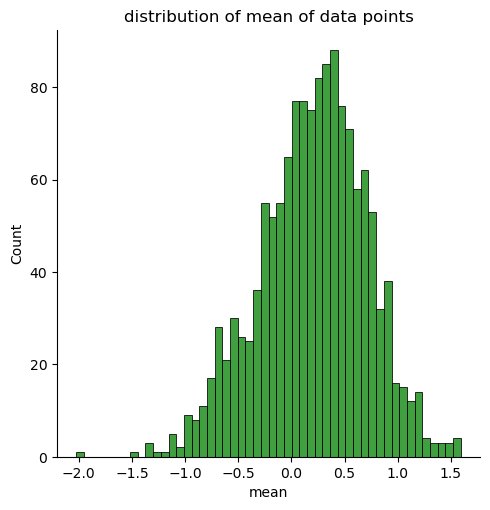

In [12]:
sns.displot(df_data_points_tr_summary.iloc[1], bins=50, color='green')
plt.title("distribution of mean of data points")
plt.show()

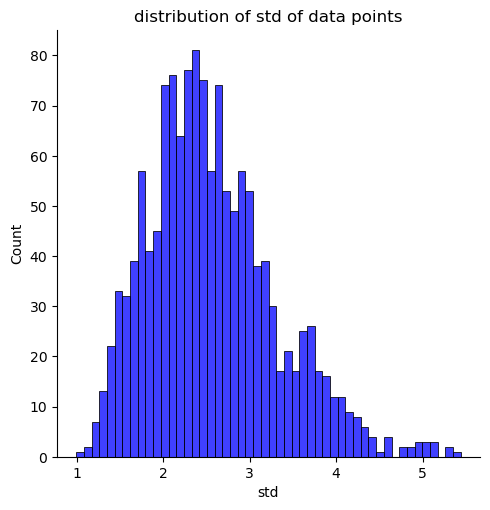

In [13]:
sns.displot(df_data_points_tr_summary.iloc[2], bins=50, color='blue')
plt.title("distribution of std of data points")
plt.show()

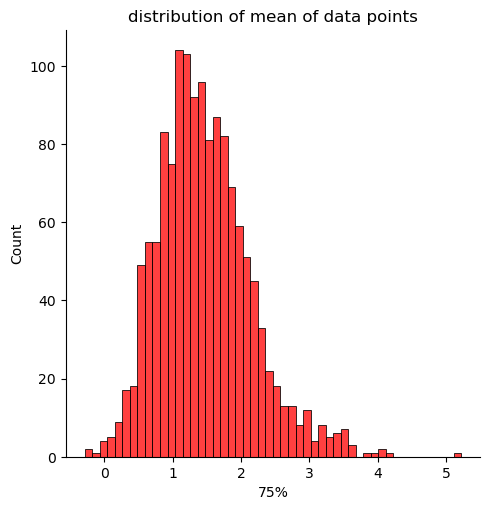

In [14]:
sns.displot(df_data_points_tr_summary.iloc[6], bins=50, color='red')
plt.title("distribution of mean of data points")
plt.show()

As it is possible to notice, The histogram of the mean values across all features for each data point seems to follow a roughly normal distribution with majority of the values lying between -1 and 1.

For the other two plots:
- they exhibit a unimodal distribution, with the peak occurring between 2 and 3 for the standard deviation and between 1 and 2 for the 75th percentile;
- in the standard deviation plot, there is a right tail extending beyond 3, suggesting the presence of data points with higher variability, which could be outliers.
- in the 75th percentile plot, the right tail indicates the presence of some data points with higher values.

Also doing the reverse (see each features across all the data points) can help us.

In [15]:
df_data_points_summary = df_data_points.describe()
df_data_points_summary

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      0.210835     0.612782    -0.082197     0.185904     0.070735   
std       2.195976     2.395809     2.358706     1.024291     2.418231   
min      -6.459859    -7.795962    -7.704676    -2.948682    -8.315868   
25%      -1.350847    -0.870054    -1.739086    -0.516367    -1.465739   
50%       0.180684     0.673686    -0.099358     0.200757     0.039412   
75%       1.768125     2.209933     1.563456     0.895352     1.709264   
max       8.326302     7.934452     8.604717     3.300430     8.083031   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  ...   
mean     -0.359291    -0.115731     0.210835     0.198517     0.050355  ...   
std       2.192464     2.295636     2.195976     2.305057     0.992986  ...   
min      -7.448146    -7.183413    -6.459859    -7.387299    -4.282637  ...   
25%      -1.849062    -1.747100    -1.350847    -1.347676    -0.634657  ...   
50%      -0.356757    -0.160878     0.180684     0.024433     0.051986  ...   
75%       1.122682     1.347230     1.768125     1.651034     0.700098  ...   
max       6.043853     9.691771     8.326302    10.334941     4.228823  ...   

        feature_16   feature_17   feature_18   feature_19   feature_20  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean     -0.099482     0.683999     0.109756     1.089425     0.018756   
std       4.080395     2.303319     1.037643     4.646323     2.226349   
min     -15.063160    -7.019747    -3.042580   -14.004747    -6.790704   
25%      -2.902051    -0.868773    -0.632218    -2.030589    -1.463973   
50%      -0.170632     0.718832     0.107171     1.124641     0.043266   
75%       2.751130     2.251132     0.825007     4.141713     1.460704   
max      14.220578     8.859061     3.351073    15.998109     8.324109   

        feature_21   feature_22   feature_23   feature_24   feature_25  
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  
mean      0.118668     0.079930    -0.132304     1.543277     0.571845  
std       1.017631     1.008222     2.360151     4.888676     2.287947  
min      -3.025071    -3.247761    -8.358437   -15.669281    -6.603355  
25%      -0.555009    -0.580996    -1.643818    -1.626720    -0.823231  
50%       0.109773     0.110199    -0.206132     1.608067     0.653977  
75%       0.752059     0.709252     1.444386     4.824556     2.188991  
max       4.014849     3.563236     9.232769    19.603832     7.851396  

[8 rows x 25 columns]

It is possible to notice that also the mean of each features across all data points seems approximately close to 0 and the variance low as well.

Plotting the distribution of each feature seems to tell us also that data has been normalized and is normally distributed.

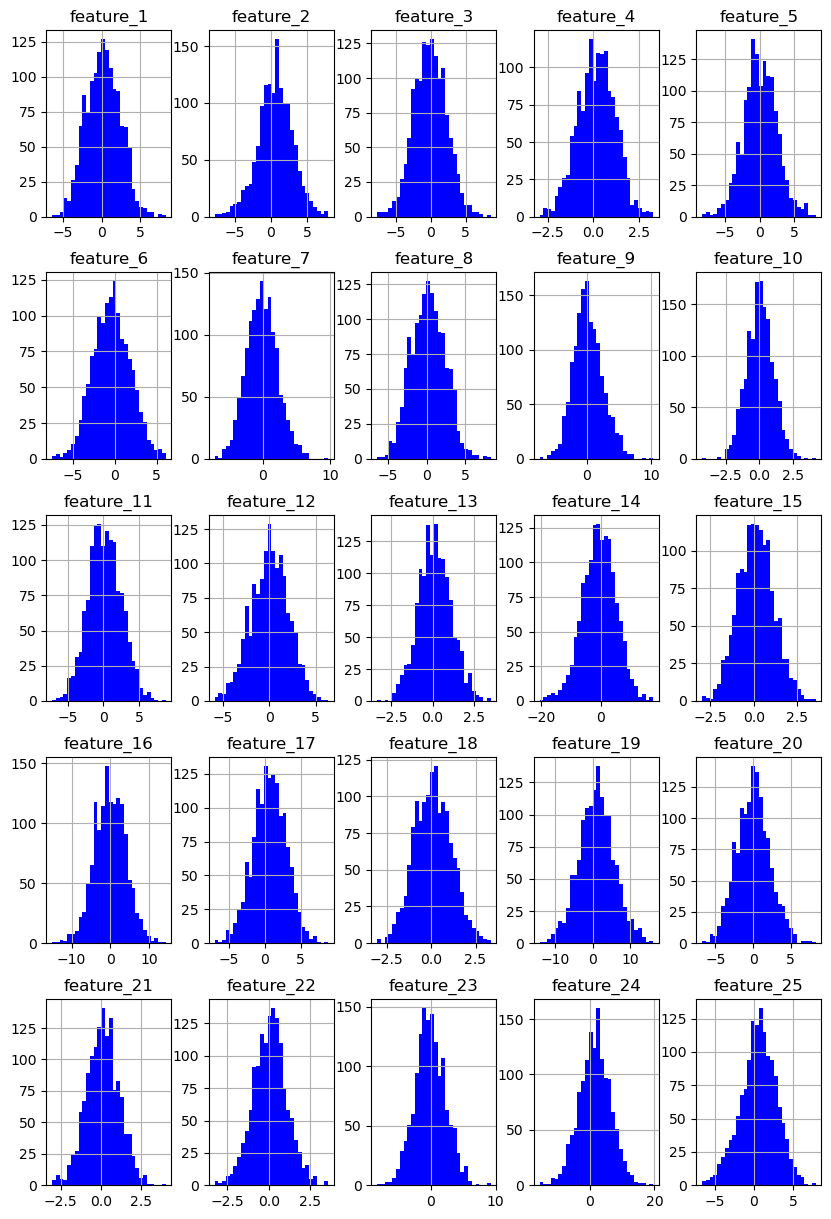

In [16]:
df_data_points.hist(figsize=(10, 15), bins=30, color='blue')
plt.show()

Finally I plot the correlation matrix in order to see if I have some kind of correlation between features.

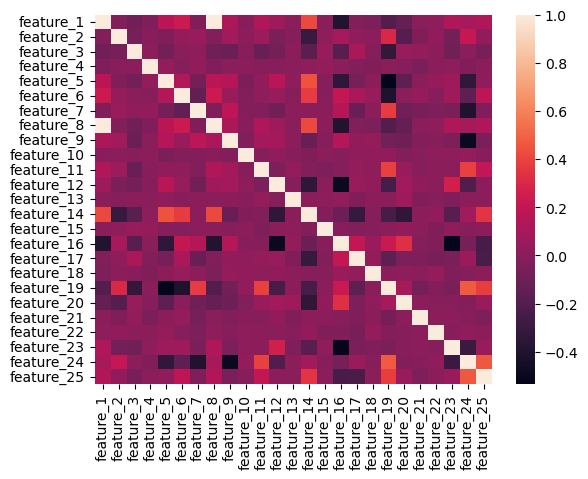

In [17]:
#plt.figure(figsize=(20, 15))  
corr = df_data_points.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)  
plt.show()

As it is possible to notice most features are uncorrelated or little correlated.
Of course it also pivotal to remember that the correlation coefficient captures linear relationship between features. So features have not linear correlation between themselves.

###
2.3 ADDITIONAL CHECK TO SEE IF DATA IS NORMALIZED

I am going to analyze the skeweness and kurtosis for each single data point and for each feature in order to verify if data is normalized or not

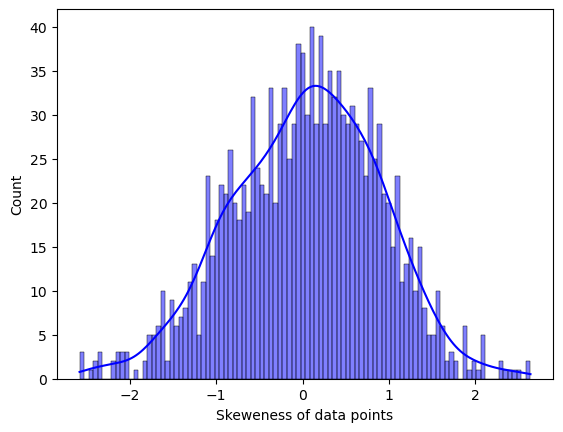

In [18]:
# Skeweness of the data points
col_points = list(df_data_points_tr.columns)
colP = np.shape(df_data_points_tr)[1]
df_skew_c = []
for i in range(colP):
    v_df = df_data_points_tr[col_points[i]]
    df_skew_c += [skew(v_df)]
df_skew_c
sns.histplot(df_skew_c, bins=100, color='blue', kde=True)
plt.xlabel('Skeweness of data points')
plt.show()

25


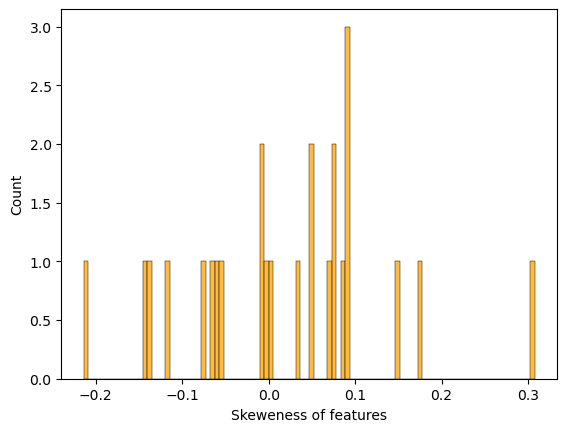

In [19]:
# Skeweness of the features
col_points = list(df_data_points.columns)
colP = np.shape(df_data_points)[1]
df_skew_c = []
for i in range(colP):
    v_df = df_data_points[col_points[i]]
    df_skew_c += [skew(v_df)]
print(len(df_skew_c))
sns.histplot(df_skew_c, bins=100, color='orange')
plt.xlabel('Skeweness of features')
plt.show()

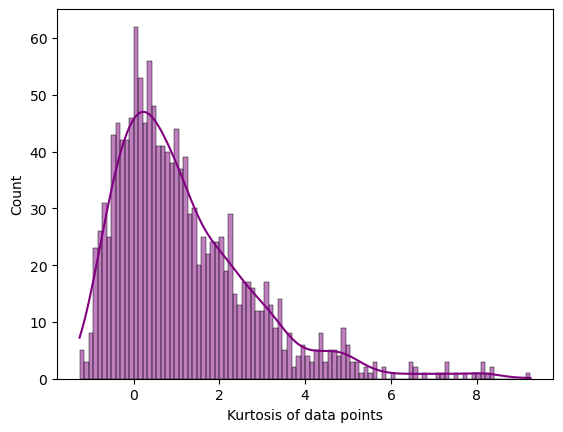

In [20]:
# Kurtosis of data points
col_points = list(df_data_points_tr.columns)
colP = np.shape(df_data_points_tr)[1]
df_kurt_c = []
for i in range(colP):
    v_df = df_data_points_tr[col_points[i]]
    df_kurt_c += [kurtosis(v_df)]
df_kurt_c
sns.histplot(df_kurt_c, bins=100, color='purple', kde=True)
plt.xlabel('Kurtosis of data points')
plt.show()

25


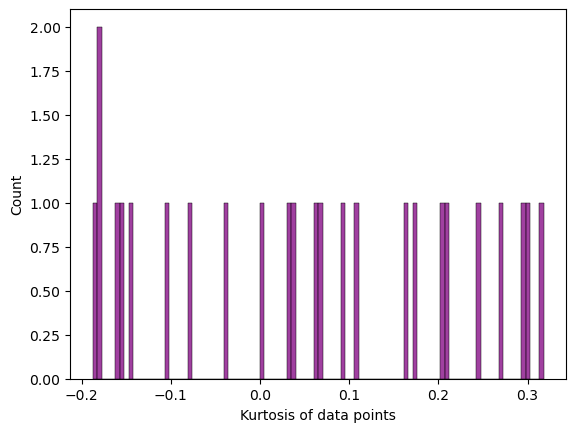

In [21]:
# Kurtosis of features
col_points = list(df_data_points.columns)
colP = np.shape(df_data_points)[1]
df_kurt_c = []
for i in range(colP):
    v_df = df_data_points[col_points[i]]
    df_kurt_c += [kurtosis(v_df)]
print(len(df_kurt_c))
sns.histplot(df_kurt_c, bins=100, color='purple')
plt.xlabel('Kurtosis of data points')
plt.show()

It is possible to see that the skewness is close to 0, since most values are between -1 and 1, with some exception regarding the data points plot where I have some points that overcome 2 or -2.

The Kurtosis has bigger values, but most of the data is still near 0 (or between the interval -1 and 2) with couple of examples having larger values.
This tells us that the distribution of the data is close to the one of a normal distribution.

###
2.4 CHECK IF CLASSES ARE BALANCED

I now want to check how the classes are distributed across the samples, in order to understand if I am going to train the models with a potential bias (for example if I have a class that appears more, my model will be trained with more data about this class and could develop a sort of bias)

label
0    295
4    290
1    274
3    271
2    270
Name: count, dtype: int64


<Axes: ylabel='count'>

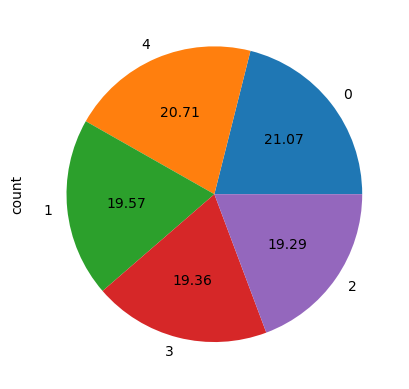

In [22]:
print(labels_t.value_counts())
labels_t.value_counts().plot.pie(autopct='%.2f')

As it is possible to notice all the classes seem to appear almost the same number of time:
- 295 data points have class 0 (21.07%)
- 274 data points have class 1 (19.57%)
- 270 data points have class 2 (19.29%)
- 271 data points have class 3 (19.36%)
- 290 data points have class 4 (20.71%)

##
3. UNSUPERVISED LEARNING METHODS

Now I am going to apply some unsupervised learning models to our dataset in order to further explore it.

In particular, I am going to apply PCA, which transforms high-dimensional data into a lower-dimensional representation while preserving the most important information by identifying the directions of maximum variance in the data.

In [23]:
pca = PCA()
df_pca = pca.fit_transform(df_data_points)

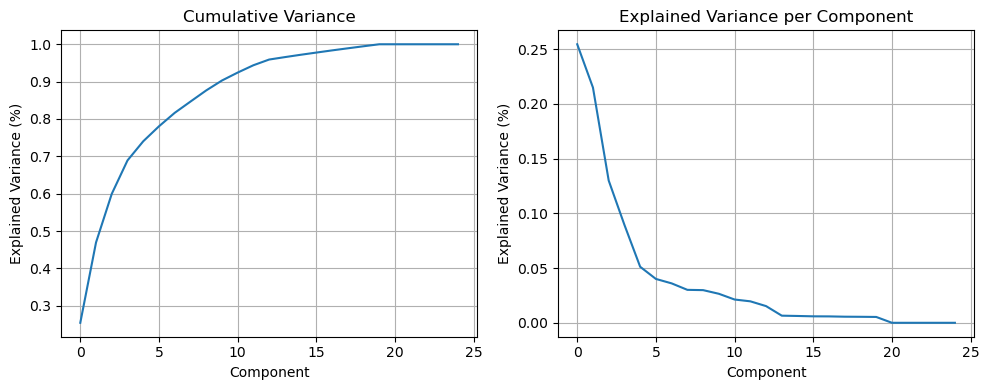

In [24]:

cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 4))

# plot 1
plt.subplot(1, 2, 1)
plt.title("Cumulative Variance")
plt.plot(cumulative_sum)
plt.xlabel("Component")
plt.ylabel("Explained Variance (%)")
plt.grid(True)
# plot 2
plt.subplot(1, 2, 2)
plt.title("Explained Variance per Component")
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance (%)")
plt.xlabel('Component')
plt.grid(True)
plt.tight_layout()
plt.show()

The cumulative variance plot shows a rapid increase initially and then a plateau, indicating that a few principal components explain most of the variance in the data. 

The elbow point seems to be at around the 5th or 6th component supporting the idea of selecting these many components for effective dimensionality reduction.

I now plot it in 2 and 3 dimensions to see if any interesting structures emerges.

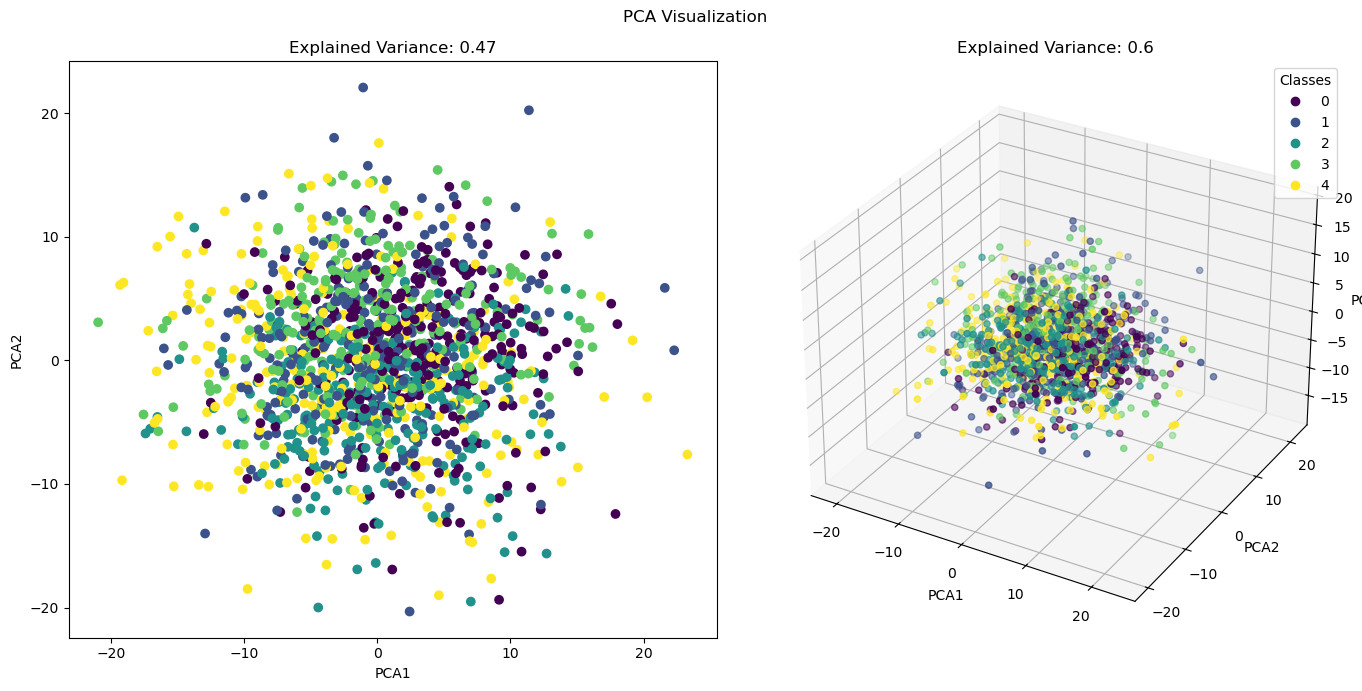

In [25]:
# Plot 2D and 3D visualizations
labels = df["label"]
fig = plt.figure(figsize=(14, 7))

# 2D Plot
ax_2d = fig.add_subplot(121)
scatter_2d = ax_2d.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
ax_2d.set_xlabel("PCA1")
ax_2d.set_ylabel("PCA2")
ax_2d.set_title(f"Explained Variance: {round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")

# 3D Plot
ax_3d = fig.add_subplot(122, projection='3d')
scatter_3d = ax_3d.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=labels)
ax_3d.set_xlabel("PCA1")
ax_3d.set_ylabel("PCA2")
ax_3d.set_zlabel("PCA3")
ax_3d.set_title(f"Explained Variance: {round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2], 2)}")

# Add legend
handles, legend_labels = scatter_2d.legend_elements()
ax_3d.legend(handles, legend_labels, loc='best', title='Classes')

plt.suptitle("PCA Visualization")
plt.tight_layout()
plt.show()

As it is possible to notice there is no real separation between classes, they are all mixed and there are no clear patterns between them.

##
4. CLASSIFIERS

I now start splitting the original dataset into training and test set. This split will be pivotal for the model I will need to work with.

In [26]:
print(df_data_points.shape, df_labels.shape)
X_train, X_test, y_train, y_test = train_test_split(df_data_points, df_labels, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape )

(1400, 25) (1400,)
(1120, 25) (1120,)
(280, 25) (280,)


###
4.1 RANDOM FOREST

####
4.1.1 SIMPLE RANDOM FOREST

I start applying the simplest random forest (no search of best parameters, no cross validation) to our dataset with an initial number of estimators of 100.

In [27]:
rfc= RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
accuracy_score(y_pred, y_test)

0.6642857142857143

As it is possible to notice I get the accuracy around the 66%, so it is not very good.  
Therefore I am going to tune the parameters in order to see if something changes.

####
4.1.2 RANDOM FOREST WITH GRID SEARCH

Now I have decided to use a Random Forest classifier with a Grid Search to find the best hyperparameters. I consider as hyperparameters that have a huge impact on our random forest the depth, the number of estimators (trees) and the criterion used.

Since it is impractical to explore all possible combinations due to time and computational constraints, I have selected a subset of hyperparameters for the grid search.

In particular:
- for the number of estimators which specifies the number of trees in the forest I chose values of 1000, 1200, and 1400. These values are significantly larger than the 100 estimators used before, aiming to improve the model's performance while not being excessively large to avoid overfitting.
- for the criterion which determines the function to measure the quality of a split I chose 'gini' (Gini impurity) and 'entropy' (Information gain), which are the two most commonly used criteria in Random Forests.
- for max_depth which specifies the maximum depth of the tree I included values 10, 20, and None ('None' means that nodes are expanded until all leaves contain less than min_samples_split samples). 

Finally for the grid configuration I used 5-fold cross-validation ( I tried to slightly vary this number, e.g with 3 or 6, but the results were almost similar).

In [30]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:
parameters = {
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [1000, 1200, 1400]
    
}

In [32]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           cv = 5,
                           n_jobs = -1, verbose=1,
                           scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'n_estimators': [1000, 1200, 1400]},
             scoring='accuracy', verbose=1)

In [34]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [35]:
y_pred_grid = rf_best.predict(X_test)

In [36]:
accuracy_score(y_pred_grid, y_test)

0.7142857142857143

So it is possible to see that the best model from the grid search has an accuracy of 71.42%. Despite it is still not incredibly high, it is better then the one of before (almost 66.4%).

I now represent graphically the confusion matrix which gives in details the distribution of the prediction (in the sense that it is possible to see how many right prediction the model gets for each class and also the wrong prediction for each class and what class was instead chosen). So it is very useful to have a precise idea on how the predictions happened.

In [37]:
cf_matrix_rf_grid = confusion_matrix(y_test, y_pred_grid)
cf_matrix_rf_grid

array([[50,  4,  3,  3,  5],
       [ 4, 40,  2,  5,  1],
       [ 9,  1, 37,  5,  3],
       [ 8,  5,  0, 40,  3],
       [ 4,  5,  8,  2, 33]])

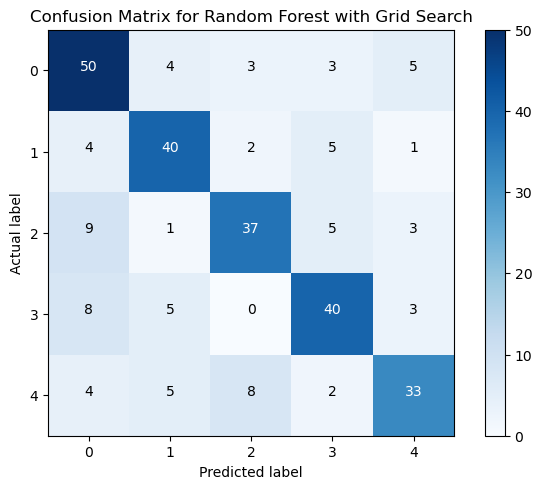

In [38]:
#plt.figure(figsize=(10, 7))
plt.imshow(cf_matrix_rf_grid, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for Random Forest with Grid Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_rf_grid.max() / 2.
for i, j in itertools.product(range(cf_matrix_rf_grid.shape[0]), range(cf_matrix_rf_grid.shape[1])):
    plt.text(j, i, cf_matrix_rf_grid[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_rf_grid[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

From the confusion matrix it is possible to notice that the random forest predicted wrong 21 data points as class 0, 15 as class 1, 14 as class 2, 12 as class 3 and 18 data points as class 4. So the most probablematic were false 0 and false 4. But this makes sense also because class 0 and class 4 were the most represented classes in the dataset (it is important to notice that this is a very small difference but it was nice to be pointed out).

I now try to implement a random forest with a random search to see if something changes.

####
4.1.3 RANDOM FOREST WITH RANDOM SEARCH

I now try to tune the parameters with a Random Grid Search, in order to see if I can get a similar or better accuracy.
Basically the goal of the random search is the one of finding the best hyperparameters for our classifier (random forest), but instead of trying combining all the parameters (as done before), it randomly combine them and choose the one with the best performance. It is useful especially in situations where we have a large number of combinations (with the con that it may leave out some of the best combinations).

In particular I choose the following parameters for the random grid (some of them are new compared to the hyperparameters used in grid search since I wanted to explore also other aspects and take advantage of the random factor):
- for the number of estimators I chose a range of values from 200 to 2000, sampled at 10 evenly spaced intervals. These values are intended to find the optimal balance between model performance and the risk of overfitting;
- for the criterion I chose 'gini' (Gini impurity) and 'entropy' (Information gain).
- for the maximum features which defines the number of features to consider when looking for the best split, I used 'auto' (all features), 'sqrt' (square root of the number of features), and 'log2' (log base 2 of the number of features), which are common choices for Random Forests.
- for the minimum samples split and for the minimum samples leaf (it defines the minimum number of samples required to be at a leaf node) I chose respectively values 2, 5, and 10 and values 1, 2, 4, and 10 (I prefer to keep smaller values in order to make my random forest as much flexible as possible)
- I consider bootstrapping as well (so if sample or not just some features).

Moreover, in this case I chose just 3 cross validation and 500 number of iterations due to the computational cost.


In [39]:
# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# depth at which stops

#max_depth = [None, 10, 20, 30]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Random Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': ['gini', 'entropy'],
               #'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False]}


In [40]:
# I use the random grid now to search for the best hyperparameters
rf_rgrid = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_rgrid, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=12, n_jobs = -1)

# Finally  I fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  10.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  11.2s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  11.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.2s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  10.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.4s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.2s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   6.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  11.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  11.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   4.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   4.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.0s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   7.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   7.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   4.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   8.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   3.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   3.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   8.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   6.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   6.6s
[CV] END 

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   9.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   4.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   8.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   9.0s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  10.5s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   8.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  10.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  10.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   7.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   7.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END boo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   7.6s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.8s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   5.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   5.0s
[CV] END 

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   3.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   3.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   3.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   4.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   4.2s
[CV] END bootstrap

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   7.9s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   8.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   8.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   4.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  10.8s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   4.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  11.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  10.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] EN

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   5.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   5.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   3.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.5s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.7s
[CV] END bootstr

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   8.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   8.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] 

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=T

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   1.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   5.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   8.6s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   5.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   4.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=Tru

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  10.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   3.1s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   5.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   5.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.5s
[CV] END bootst

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   4.8s
[CV] END boots

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   4.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   4.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   5.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   7.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   7.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   7.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   5.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   8.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   8.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   8.5s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   6.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END bootstra

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.2s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  10.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  10.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=  10.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   3.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   3.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   3.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.5s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1800; total time=   8.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.9s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   8.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   8.1s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.3s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   2.9s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.9s
[CV] END 

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.2s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   9.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   9.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   9.1s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   3.

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   6.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   6.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   7.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.0s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   7.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   6.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   6.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   6.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   4.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   4.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   4.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   9.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=   9.7s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstra

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   6.4s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   6.4s

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   7.4s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   7.7s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   7.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.4s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   7.6s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   7.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.2s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   7.6s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   7.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   7.8s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.3s
[C

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   9.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   9.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  10.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   6.2s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   6.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   6.2s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.3s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.3s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.0s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  11.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   6.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.7s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.8s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   4.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   5.0s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   6.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   6.8s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   5.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.8s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   6.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   6.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   4.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   5.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   5.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   5.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   7.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   7.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   7.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   7.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   8.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   7.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.5s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   6.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   9.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   7.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   6.8s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.6s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   4.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   4.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   4.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   6.4s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   6.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   6.8s
[CV] END bootstrap=T

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END bootstrap=Tr

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   7.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   7.3s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   7.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   5.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   3.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   7.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   7.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   7.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   7.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   7.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   7.4s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootst

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=Tru

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   6.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   7.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   7.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   4.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   4.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   4.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   6.0s
[CV] END bootstrap

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   7.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   7.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   7.7s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.8s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   5.8s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   5.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   6.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   6.0s
[CV] END b

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   4.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   4.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1800; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   6.0s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   6.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   5.8s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  11.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  11.7s
[

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  12.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  14.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   8.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   6.1s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   8.7s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   8.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   4.5s
[C

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.0s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   4.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   8.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   3.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  12.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.2s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   4.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   4.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   5.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.0s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   7.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   7.9s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  10.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   8.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  10.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=  10.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   1.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   1.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.3s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.4s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   3.1s
[C

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   3.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   5.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1600; total time=   5.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   5.9s
[CV] END bootstrap=F

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   6.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   6.2s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   6.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   8.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   8.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=Fal

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   7.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   7.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   8.0s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootst

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   8.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=Tr

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  12.3s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  12.5s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  1

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   5.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   5.6s
[CV] END

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.6s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   7.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   7.4s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   7.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   3.5s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.7s
[CV] END boo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   7.5s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   8.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   6.5s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   6.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.3s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.5s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   6.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   6.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.6s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   6.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   6.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   4.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.4s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   9.3s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.3s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   3.6s
[CV] END bo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   7.8s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   7.7s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   7.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   8.3s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   6.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   3.0s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   8.5s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   8.8s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   7.0s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   7.0s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1600; total time=   4.3s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   5.7s
[C

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   2.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   8.0s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   8.0s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   8.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   6.6s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   4.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   6.7s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2000; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   6.9s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   3.9s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   3.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   3.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   7.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   7.5s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   7.3s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   5.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   5.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1600; total time=   5.2s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.4s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.5s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.7s
[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.7s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   7.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   4.9s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   2.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.7s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   8.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   8.1s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.8s
[CV] END bootstrap=False, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   6.3s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   6.5s
[CV] END 

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   5.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.1s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.3s
[CV] END bootstrap=True, criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.4s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.4s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1400; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.2s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.0s
[CV] END bootstrap

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   6.1s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   6.6s
[CV] END bootstrap=False, criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   6.4s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time=   2.7s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   3.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.7s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.8s
[CV] END bo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.6s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.4s
[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   3.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.3s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.9s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.8s
[CV] END bootstrap=False, criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.8s
[CV] END boots

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=12, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'gini',
 'bootstrap': False}

In [51]:
best_random_est = rf_random.best_estimator_
best_random_est

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=1200)

In [52]:
best_random_est.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=1200)

In [53]:
y_pred_g_random = best_random_est.predict(X_test)

In [54]:
accuracy_score(y_pred_g_random, y_test)

0.7285714285714285

The accuracy of the best random forest model from the random search is approximately of 72.8% so a little bit higher then the one of the grid search. Still, it is not very satisfying.

I am now going to represent the confusion matrix for this classifier.

In [46]:
cf_matrix_rf_random = confusion_matrix(y_test, y_pred_g_random)
cf_matrix_rf_random


array([[51,  4,  3,  2,  5],
       [ 2, 40,  2,  6,  2],
       [ 5,  1, 40,  3,  6],
       [ 8,  4,  0, 40,  4],
       [ 3,  5,  7,  2, 35]])

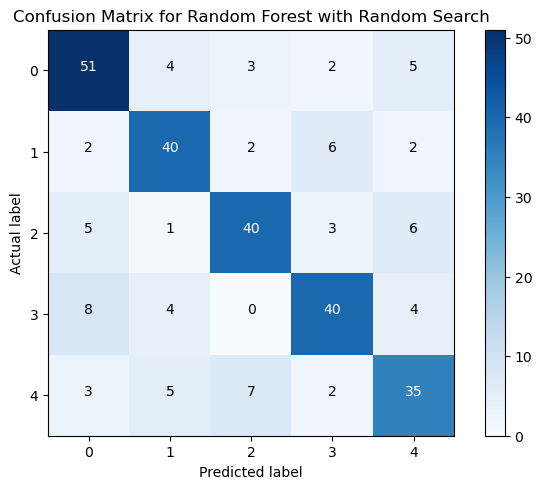

In [47]:
plt.imshow(cf_matrix_rf_random, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for Random Forest with Random Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_rf_random.max() / 2.
for i, j in itertools.product(range(cf_matrix_rf_random.shape[0]), range(cf_matrix_rf_random.shape[1])):
    plt.text(j, i, cf_matrix_rf_random[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_rf_random[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

####
4.1.4 RANDOM FOREST WITH BAYESIAN SEARCH 

Here I use a Random Forest classifier with Bayesian Search to find the best hyperparameters. 
It is an advanced method for hyperparameter tuning that builds a probabilistic model of the function mapping hyperparameters to a performance metric. It uses this model to select the most promising hyperparameters to evaluate next, aiming to find the best hyperparameters more efficiently than random or grid search.

In this case, I initialized the search space with similar parameters as before (without specifying in this case the criterion) adding the maximum depth parameter. Moreover I consider 3 cross validation and just 100 number of iterations.

In [55]:
# Define the search space
search_space = {
    'n_estimators': Integer(200, 2000),
    'max_features': Categorical(['auto', 'sqrt', 'log2']),
    'max_depth': Integer(10, 110),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'bootstrap': Categorical([True, False])
}

# Initialize the model
rf_b = RandomForestClassifier(random_state=42)

# Bayesian search
bayes_search = BayesSearchCV(
    estimator=rf_b,
    search_spaces=search_space,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)




In [56]:
# Fit the Bayesian search
bayes_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=945; total time=   1.8s
[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=945; total time=   1.8s
[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=945; total time=   1.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=98, max_features=auto, min_samples_leaf=10, min_samples_split=9, n_estimators=312; total time=   0.8s
[CV] END bootstrap=False, max_depth=98, max_features=auto, min_samples_leaf=10, min_samples_split=9, n_estimators=312; total time=   0.8s
[CV] END bootstrap=False, max_depth=98, max_features=auto, min_samples_leaf=10, min_samples_split=9, n_estimators=312; total time=   0.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=102, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1017; total time=   2.1s
[CV] END bootstrap=True, max_depth=102, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1017; total time=   2.2s
[CV] END bootstrap=True, max_depth=102, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=1017; total time=   2.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=27, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=372; total time=   1.0s
[CV] END bootstrap=False, max_depth=27, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=372; total time=   1.0s
[CV] END bootstrap=False, max_depth=27, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=372; total time=   0.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=54, max_features=sqrt

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=104, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=871; total time=   2.6s
[CV] END bootstrap=False, max_depth=104, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=871; total time=   2.6s
[CV] END bootstrap=False, max_depth=104, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=871; total time=   2.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=1270; total time=   3.2s
[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=1270; total time=   3.2s
[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=1270; total time=   3.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=102, max_features=

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=105, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=105, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=105, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=200; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=2000; total time=   4.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=53, max_features=sqrt

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=794; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=794; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=794; total time=   2.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1736; total time=   4.5s
[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1736; total time=   4.5s
[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1736; total time=   4.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, m

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=59, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=242; total time=   0.7s
[CV] END bootstrap=False, max_depth=59, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=242; total time=   0.8s
[CV] END bootstrap=False, max_depth=59, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=242; total time=   0.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1986; total time=   6.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1986; total time=   6.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1986; total time=   6.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   5.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=110, max_features=

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1978; total time=   4.6s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1978; total time=   4.7s
[CV] END bootstrap=True, max_depth=87, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1978; total time=   4.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=61, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1920; total time=   6.2s
[CV] END bootstrap=False, max_depth=61, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1920; total time=   6.2s
[CV] END bootstrap=False, max_depth=61, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1920; total time=   6.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=37, max_features

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   6.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=109, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=266; total time=   0.9s
[CV] END bootstrap=False, max_depth=109, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=266; total time=   0.9s
[CV] END bootstrap=False, max_depth=109, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=266; total time=   0.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=23, max_features

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=96, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1950; total time=   6.8s
[CV] END bootstrap=False, max_depth=96, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1950; total time=   6.8s
[CV] END bootstrap=False, max_depth=96, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1950; total time=   6.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=79, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=206; total time=   0.5s
[CV] END bootstrap=True, max_depth=79, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=206; total time=   0.5s
[CV] END bootstrap=True, max_depth=79, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=206; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=98, max_features=log2, m

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1428; total time=   4.9s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1428; total time=   4.9s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1428; total time=   4.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1424; total time=   4.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1424; total time=   4.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1424; total time=   4.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=93, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=227; total time=   0.5s
[CV] END bootstrap=False, max_depth=93, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=227; total time=   0.6s
[CV] END bootstrap=False, max_depth=93, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=227; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=40, max_feature

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1464; total time=   5.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1464; total time=   5.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1464; total time=   5.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1534; total time=   4.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1534; total time=   4.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1534; total time=   4.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=16, max_feature

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1379; total time=   3.5s
[CV] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1379; total time=   3.5s
[CV] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1379; total time=   3.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1987; total time=   5.3s
[CV] END bootstrap=False, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1987; total time=   5.3s
[CV] END bootstrap=False, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1987; total time=   5.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1983; total time=   6.4s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1983; total time=   6.4s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1983; total time=   6.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=63, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1149; total time=   3.3s
[CV] END bootstrap=False, max_depth=63, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1149; total time=   3.3s
[CV] END bootstrap=False, max_depth=63, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1149; total time=   3.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=102, max_features=l

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1947; total time=   6.2s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1947; total time=   6.2s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1947; total time=   6.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=98, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1993; total time=   5.0s
[CV] END bootstrap=True, max_depth=98, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1993; total time=   5.0s
[CV] END bootstrap=True, max_depth=98, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1993; total time=   5.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1981; total time=   4.4s
[CV] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1981; total time=   4.4s
[CV] END bootstrap=True, max_depth=42, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1981; total time=   4.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=30, max_features=log2, m

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1860; total time=   6.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1860; total time=   6.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1860; total time=   6.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=95, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1859; total time=   5.4s
[CV] END bootstrap=False, max_depth=95, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1859; total time=   5.4s
[CV] END bootstrap=False, max_depth=95, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1859; total time=   5.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=32, max_features=s

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=227; total time=   0.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=227; total time=   0.7s
[CV] END bootstrap=False, max_depth=21, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=227; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=92, max_features=log2, m

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1984; total time=   4.9s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1984; total time=   5.0s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1984; total time=   5.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=327; total time=   0.7s
[CV] END bootstrap=True, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=327; total time=   0.7s
[CV] END bootstrap=True, max_depth=86, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=327; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=44, max_features=log2, min_s

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.5s
[CV] END bootstrap=True, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.5s
[CV] END bootstrap=True, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1922; total time=   4.0s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1922; total time=   4.0s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1922; total time=   4.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=81, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=267; total time=   0.5s
[CV] END bootstrap=True, max_depth=81, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=267; total time=   0.5s
[CV] END bootstrap=True, max_depth=81, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=267; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, mi

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

[CV] END bootstrap=False, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1937; total time=   6.1s
[CV] END bootstrap=False, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1937; total time=   6.1s
[CV] END bootstrap=False, max_depth=109, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1937; total time=   6.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1897; total time=   5.5s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1897; total time=   5.5s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1897; total time=   5.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=109, max_

BayesSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
              n_iter=100, n_jobs=-1, random_state=42,
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=10, high=110, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('auto', 'sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=200, high=2000, prior='uniform', transform='normalize')},
              verbose=2)

In [57]:
# Best parameters and accuracy
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best cross-validation accuracy: {bayes_search.best_score_}")


Best parameters: OrderedDict([('bootstrap', False), ('max_depth', 78), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 326)])
Best cross-validation accuracy: 0.6839424046489179


In [58]:
# Evaluate on the test set
best_rf_bayes = bayes_search.best_estimator_
#test_accuracy_bayes = best_rf_bayes.score(X_test, y_test)
#print(f"Test accuracy: {test_accuracy_bayes:.4f}")

In [102]:
best_rf_bayes


RandomForestClassifier(bootstrap=False, max_depth=78, max_features='log2',
                       n_estimators=326, random_state=42)

In [59]:
y_pred_bayes = best_rf_bayes.predict(X_test)

In [60]:
accuracy_score(y_pred_bayes, y_test)

0.7321428571428571

So the accuracy of our random forest with Bayesian search is better then the others: 73%. I also used less interactions (just 100 and not 500 as in the random search).
So from the simplest random forest (the one without any cross validation or any search) with accuracy 66% we reached 73%.
It is not very high but considering that I have 5 classes to predict, it is pretty good.

Again I am going to plot the confusion matrix in order to see how the predictions both the right and the wrong ones have been distributed.

In [61]:
cf_matrix_rf_bayes = confusion_matrix(y_test, y_pred_bayes)
cf_matrix_rf_bayes

array([[51,  5,  3,  2,  4],
       [ 2, 39,  2,  7,  2],
       [ 6,  1, 42,  1,  5],
       [ 8,  6,  0, 38,  4],
       [ 4,  5,  7,  1, 35]])

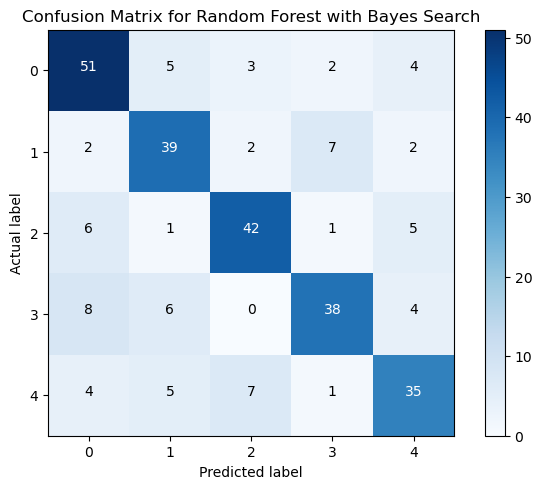

In [62]:
plt.imshow(cf_matrix_rf_bayes, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for Random Forest with Bayes Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_rf_bayes.max() / 2.
for i, j in itertools.product(range(cf_matrix_rf_bayes.shape[0]), range(cf_matrix_rf_bayes.shape[1])):
    plt.text(j, i, cf_matrix_rf_bayes[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_rf_bayes[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()  

From the confusion matrix it is possible to notice that the random forest predicted wrong 20 data points as class 0, 17 as class 1, 12 as class 2, 11 as class 3 and 15 data points as class 4. So the most probablematic is always false 0. (also in the one others).



To see the size of the random forest I plot one of the tree.

<Figure size 800x800 with 0 Axes>

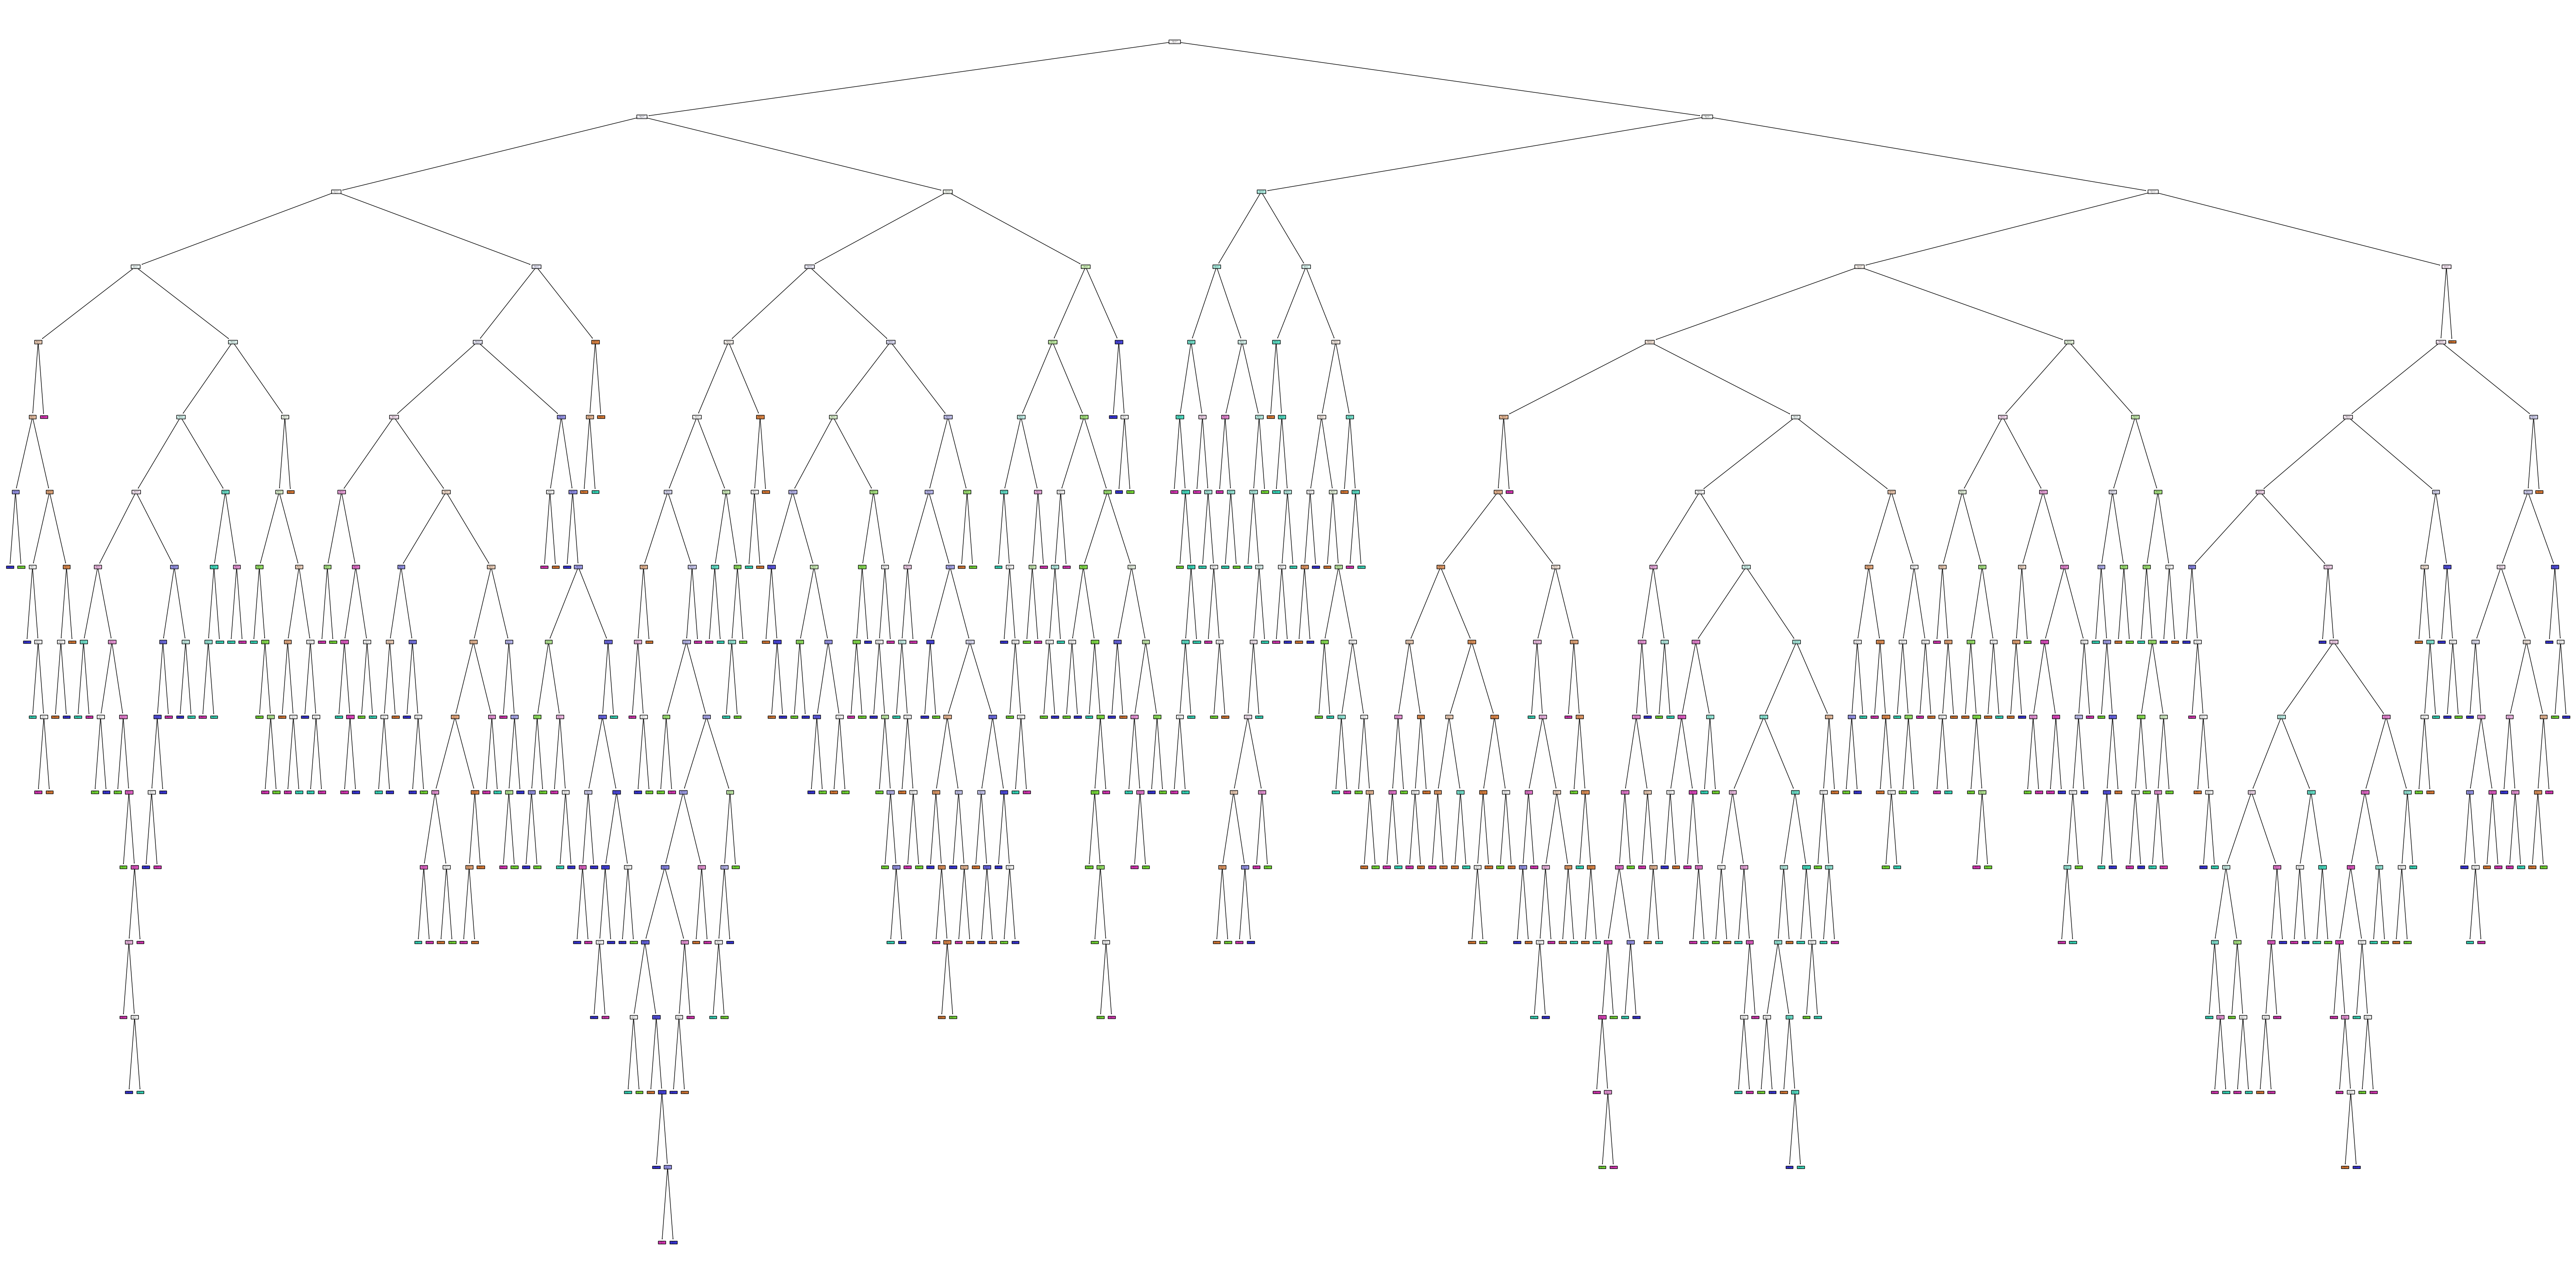

In [64]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(8,8))
plt.figure(figsize=(80,40))
plot_tree(best_rf_bayes.estimators_[0], feature_names=df_data_points.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
fig.savefig('rf_individualtree.png')

Finally since I have implemented a random forest, I want to see if there are some features that are more important then the others.
Therefore I make a rank in order to understand the impact of each of the 25 features (again I am applying this just to the last random forest, the one performed with the Bayes Search)

In [65]:
df_importance = pd.DataFrame(best_rf_bayes.feature_importances_, index=df_data_points.columns, columns=['importance'])
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False)
df_importance_sorted

importance
feature_20    0.062109
feature_19    0.057101
feature_11    0.055179
feature_9     0.053888
feature_3     0.052883
feature_7     0.051550
feature_17    0.047547
feature_6     0.044916
feature_12    0.044347
feature_25    0.043836
feature_24    0.042901
feature_16    0.042853
feature_2     0.041756
feature_8     0.041355
feature_1     0.040886
feature_14    0.040595
feature_5     0.038976
feature_23    0.038294
feature_4     0.023685
feature_15    0.023309
feature_10    0.023308
feature_18    0.022646
feature_13    0.022306
feature_21    0.022169
feature_22    0.021603

What it is immediately clear is that the features do not have a very great difference on their impact on the data points (infact feature 20, the first one, has importance of 0.062 while the last one has an importance of 0.021). This is probably to the fact that this data is generated from a normal distribution.

Moreover this could be also a cause to not manage to get an higher accuracy.

####
4.1.5  RANDOM FOREST MODEL SELECTION

In this section, I am going to evaluate the performance of the Random Forest models using different hyperparameter search methods: Grid Search, Random Search, and Bayesian Search.

I consider three key metrics (in addition to accuracy and confusion matrix already computed for each single method in the above steps):
- precision score that is the ratio between True positive and the sum of True Positive and False Positives (TP/(TP+FP));
- recall (also called sensitivity) that is the ratio between True Positives and the sum of True Positive and False Negative (TP/(TP+FN))
- f1-score that is the weighted average of the precision and recall score.

Moreover, since I had multiple classes as a labels (and not a binary situation) I used the average method 'macro' which gives the same importance to each class (this choice comes from the fact that the classes are well balanced and therefore was useless to give more importance to some specific class).

Finally, I generate classification reports for each search method to provide a detailed breakdown of the model's performance for each class.

In [66]:
average_method ='macro'
for score in (precision_score, recall_score, f1_score):
    sgrid_stat_rf = score(y_test, y_pred_grid, average=average_method)
    srandom_stat_rf = score(y_test, y_pred_g_random, average=average_method)
    sbayes_stat_rf = score(y_test, y_pred_bayes, average=average_method)
    print(score.__name__, (sgrid_stat_rf, srandom_stat_rf, sbayes_stat_rf))

precision_score (0.7189090909090909, 0.7289155811508753, 0.7336052824885823)
recall_score (0.712017982017982, 0.7256543456543457, 0.72998001998002)
f1_score (0.7135688524608459, 0.7262796461786843, 0.730589691534106)


In [67]:
c_report_grid_rf = classification_report(y_test, y_pred_grid, target_names=['0', '1', '2', '3', '4'])
c_report_random_rf = classification_report(y_test, y_pred_g_random, target_names=['0', '1', '2', '3', '4'])
c_report_bayes_rf = classification_report(y_test, y_pred_bayes, target_names=['0', '1', '2', '3', '4'])
print(c_report_grid_rf, c_report_random_rf, c_report_bayes_rf)

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        65
           1       0.73      0.77      0.75        52
           2       0.74      0.67      0.70        55
           3       0.73      0.71      0.72        56
           4       0.73      0.63      0.68        52

    accuracy                           0.71       280
   macro avg       0.72      0.71      0.71       280
weighted avg       0.72      0.71      0.71       280
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        65
           1       0.73      0.77      0.75        52
           2       0.73      0.69      0.71        55
           3       0.78      0.71      0.75        56
           4       0.68      0.65      0.67        52

    accuracy                           0.73       280
   macro avg       0.73      0.73      0.73       280
weighted avg       0.73      0.73      0.73       280
               precisio

As it is possible to notice the best Random forest model is the one got with Bayes Search which reaches almost 73% in each metric I considered.
This will be the Random Forest I will compare with the best KNN model (see the steps below).

So summarizing the best random forest model found with Bayesian search has the following hyperparameters: 
- Bootstrap = False
- Max_depth = 78
- Max_features = log2
- Min_samples_leaf = 1
- Min_samples_split = 2
- N_estimators = 326

###
4.2 KNN

I start now implementing the K-Nearest Neighbors, again starting implementing it in the simplest way (no cross validation, no search) and then adding hyperparameters tuning techniques to see if the accuracy improves

####
4.2.1 SIMPLE KNN

I start just implementing a KNN model without any hyperparameter tuning technique, fitting it and make it predict the test data.

The accuracy is again not very high (67.85%, so a little bit higher then the accuracy of the first random forest implemented).

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred_knn = knn.predict(X_test)
accuracy_score(y_pred_knn, y_test)

0.6785714285714286

Now since it is known that the number of neighbours is pivotal in the model performance (and before I used the default value, since I did not specify it), I am going to make several manual trials of how the model varies with changing in the neighbors value. (starting without any kind of cross validation).

The number of neighbors where the accuracy is maximized is: 9


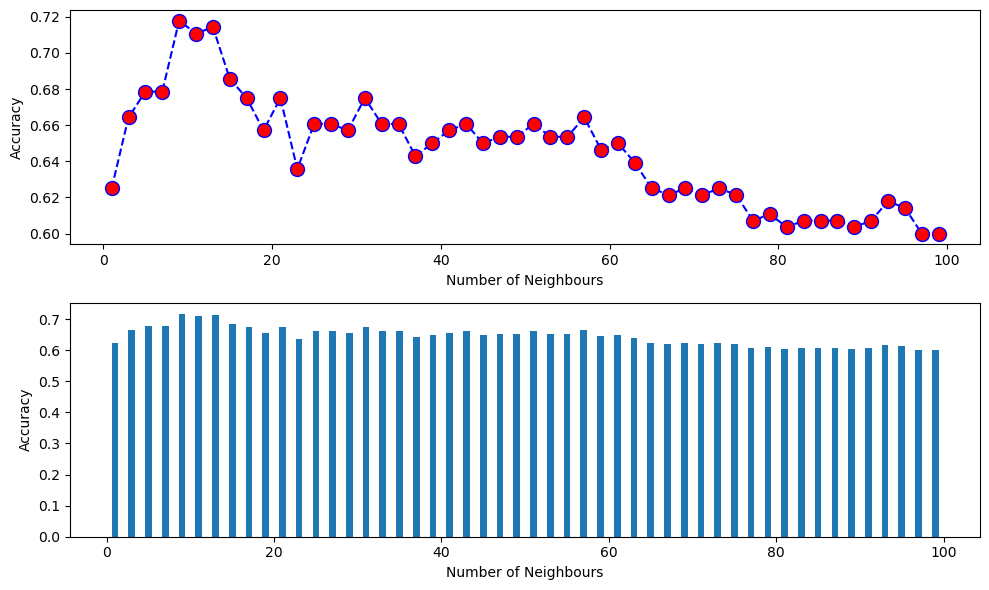

In [70]:
accuracy = []
k_values = list(range(1, 100, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_pred, y_test))

# Find the k value with maximum accuracy
max_accuracy_index = np.argmax(accuracy)
k_max_accuracy = k_values[max_accuracy_index]
print(f"The number of neighbors where the accuracy is maximized is: {k_max_accuracy}")


# First plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.plot(range(1, 100, 2), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

# Second plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar([i for i in range(1, len(accuracy)*2, 2)], accuracy)  # Adjust range to match length of accuracy
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()


From this simple experiment of testing KNN with different neighbours values it is possible to notice that the highest accuracy is reached between 0 and 20 (in particular at 9 with accuracy of almost 72% which is higher then the 68% found at the default k=5 tried at the beginning), while after 20 (a part for a small peak) the accuracy decreases drastically until to arrive at approximately 60% with k=99. Moreover in this situation I have used a default metric and  default weights (in grid search, random search and bayes search I will try to look for the best combinations).

Below an experiment with using 5 cross validations and what I get is a worst or in some situation similar result.

The number of neighbors where the accuracy is maximized is: 9


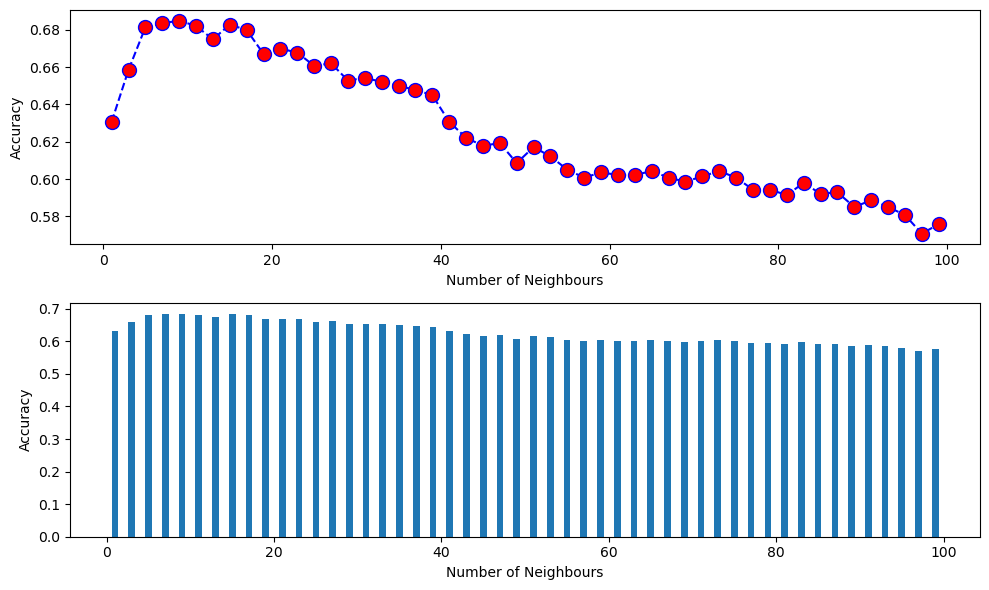

In [71]:
accuracy = []
k_values = list(range(1, 100, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_data_points, df_labels, cv=5, scoring='accuracy')
    accuracy.append(scores.mean())

# Find the k value with maximum accuracy
max_accuracy_index = np.argmax(accuracy)
k_max_accuracy = k_values[max_accuracy_index]
print(f"The number of neighbors where the accuracy is maximized is: {k_max_accuracy}")


# First plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.plot(range(1, 100, 2), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

# Second plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.bar([i for i in range(1, len(accuracy)*2, 2)], accuracy)  # Adjust range to match length of accuracy
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

####
4.2.2 KNN WITH GRID SEARCH

Now I have decided to use a KNN classifier with a Grid Search to find the best hyperparameters. I consider as hyperparameters that have a huge impact on our KNN the weights, the metric (that measures the distance between data points), the algorithm and indeed the number of neighbors (already found before) used.  

Since it is impractical to explore all possible combinations due to time and computational constraints, I have selected a subset of hyperparameters for the grid search.

In particular:
- for the number of neighbours I chose the interval of values 1-20 thanks to the results discovered in the former point;
- for the weights which determine how each neighbor contributes to the classification decision I chose uniform (all neighbors contribute equally to the classification decision) and distance (closer neighbors contribute more to the classification decision than farther ones).
- for the metric I chose the most famous euclidean, manhattan, minkowski, and chebyshev. 
- for the algorithm which tells us the most efficient way to compute the neighbors I chose auto, ball tree and kd_tree.

Finally for the grid configuration I used 5-fold cross-validation (as I did with RF grid search).

In [72]:

# Define the parameter grid
param_grid_k = {
    'n_neighbors': list(range(1, 20, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
    
}

# Initialize the KNN classifier
knn_g = KNeighborsClassifier()

In [73]:
# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_g, param_grid=param_grid_k, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_knn.best_score_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time

In [74]:
best_knn_grid = grid_search_knn.best_estimator_
best_knn_grid

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [75]:
# Evaluate on the test set with the best estimator

y_pred_best_k_grid = best_knn_grid.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best_k_grid)
print(f'Best KNN Test Accuracy: {best_accuracy:.4f}')

Best KNN Test Accuracy: 0.7071


As it was possible to imagine, I get as test accuracy 70.71% with n_neighbours = 9 (I already saw this in the former step), the weight is distance and as metric the manhattan distance. 
This improves the initial accuracy of the first KNN model I tested (in that case it was approximately 67%).

I now represent graphically the confusion matrix which gives in details the distribution of the prediction (in the sense that it is possible to see how many right prediction the model gets for each class and also the wrong prediction for each class and what class was instead chosen). So it is very useful to have a precise idea on how the predictions happened.

In [76]:
cf_matrix_knn_grid = confusion_matrix(y_test, y_pred_best_k_grid)
cf_matrix_knn_grid

array([[50,  4,  3,  3,  5],
       [ 1, 43,  1,  3,  4],
       [10,  1, 36,  2,  6],
       [ 9, 10,  0, 34,  3],
       [ 4,  2,  8,  3, 35]])

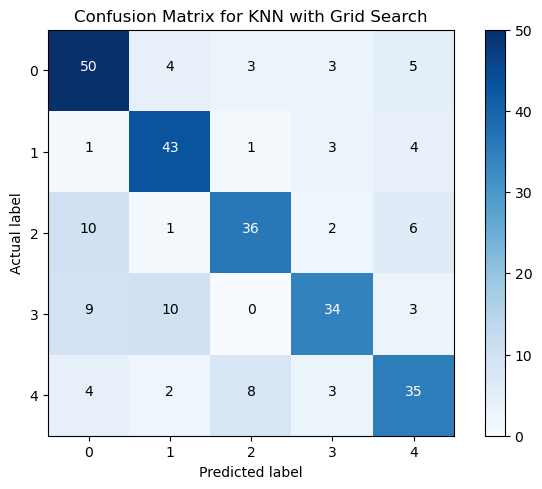

In [77]:
#plt.figure(figsize=(10, 7))
plt.imshow(cf_matrix_knn_grid, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for KNN with Grid Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_knn_grid.max() / 2.
for i, j in itertools.product(range(cf_matrix_knn_grid.shape[0]), range(cf_matrix_knn_grid.shape[1])):
    plt.text(j, i, cf_matrix_knn_grid[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_knn_grid[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

From the confusion matrix it is possible to notice that the KNN with grid search predicted wrong 24 data points as class 0, 17 as class 1, 12 as class 2, 11 as class 3 and 18 data points as class 4. So the most probablematic were false 0 and false 4. But this makes sense also because class 0 and class 4 were the most represented classes in the dataset (it is important to notice that this is a very small difference but it was nice to be pointed out).

I now try to implement a KNN with a random search to see if something changes.

####
4.2.3 KNN WITH RANDOM SEARCH

Now I have decided to use a KNN classifier with a Random Search to find the best hyperparameters. As before I consider as hyperparameters the weights, the metric, the algorithm and the number of neighbors.  

I also kept the same values/intervals for the hyperparameters of the grid search, in particular:
- for the number of neighbours I chose the interval of values 1-20 thanks to the results discovered in the first section of KNN;
- for the weights I chose uniform and distance.
- for the metric I chose again the most famous euclidean, manhattan, minkowski, and chebyshev. 
- for the algorithm I chose auto, ball tree and kd_tree.

Finally for the random configuration I used 5-fold cross-validation and 500 number of iterations.

In [78]:
param_dist_random = {
    'n_neighbors': list(range(1, 20, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

knn_random = KNeighborsClassifier()

In [79]:
# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn_random, param_distributions=param_dist_random, n_iter=500, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_knn.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters: {random_search_knn.best_params_}")
print(f"Best cross-validation accuracy: {random_search_knn.best_score_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 240 is smaller than n_iter=500. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=

In [80]:
best_knn_random = random_search_knn.best_estimator_
best_knn_random

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [81]:
# Evaluate on the test set with the best estimator
y_pred_best_random_knn = best_knn_random.predict(X_test)
best_accuracy_random_knn = accuracy_score(y_test, y_pred_best_random_knn)
print(f'Best KNN Test Accuracy (Random Search): {best_accuracy_random_knn:.4f}')

Best KNN Test Accuracy (Random Search): 0.7071


Also with random search and same parameters as in the grid search I get the same result (differently instead from the random forest scenario where in the random search I modified some parameters).

I now represent graphically the confusion matrix which gives in details the distribution of the prediction (in the sense that it is possible to see how many right prediction the model gets for each class and also the wrong prediction for each class and what class was instead chosen). So it is very useful to have a precise idea on how the predictions happened.


In [82]:

cf_matrix_knn_random = confusion_matrix(y_test, y_pred_best_random_knn)
cf_matrix_knn_random


array([[50,  4,  3,  3,  5],
       [ 1, 43,  1,  3,  4],
       [10,  1, 36,  2,  6],
       [ 9, 10,  0, 34,  3],
       [ 4,  2,  8,  3, 35]])

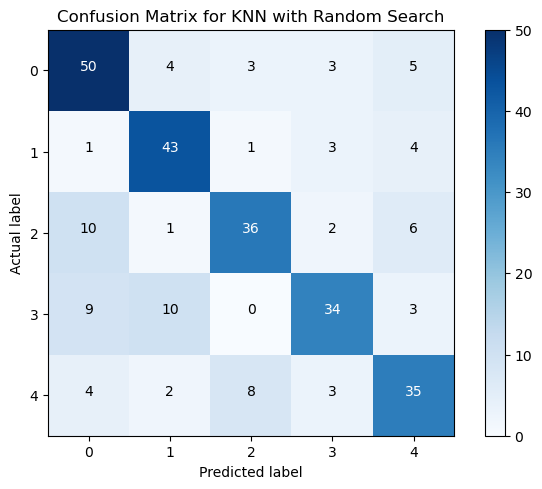

In [83]:
#plt.figure(figsize=(10, 7))
plt.imshow(cf_matrix_knn_random, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for KNN with Random Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_knn_random.max() / 2.
for i, j in itertools.product(range(cf_matrix_knn_random.shape[0]), range(cf_matrix_knn_random.shape[1])):
    plt.text(j, i, cf_matrix_knn_random[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_knn_random[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



From the confusion matrix it is possible to notice that the KNN with random search predicted wrong 24 data points as class 0, 17 as class 1, 12 as class 2, 11 as class 3 and 18 data points as class 4. So the most probablematic were false 0 and false 4. But this makes sense also because class 0 and class 4 were the most represented classes in the dataset (it is important to notice that this is a very small difference but it was nice to be pointed out).

I now try to implement a KNN with a bayesian search to see if something changes.

####
4.2.4 KNN WITH BAYESIAN SEARCH

Now I have decided to use a KNN classifier with a Bayesian Search to find the best hyperparameters. As before I consider as hyperparameters the weights, the metric, the algorithm and the number of neighbors.  

I also kept the same values/intervals for the hyperparameters search space of the random search, in particular:
- for the number of neighbours I chose the interval of values 1-20 thanks to the results discovered in the first section of KNN;
- for the weights I chose uniform and distance.
- for the metric I chose again the most famous euclidean, manhattan, minkowski, and chebyshev. 
- for the algorithm I chose auto, ball tree and kd_tree.

Finally for the bayesian configuration I used 5-fold cross-validation and 100 number of iterations (so I decreased the number of iterations compared to the random search).

In [84]:
search_space_k = {
    'n_neighbors': Integer(1, 20),
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski', 'chebyshev']),
    'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree'])
}

# Initialize the KNN classifier
knn_b = KNeighborsClassifier()

In [85]:
# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=knn_b,
    search_spaces=search_space_k,
    n_iter=100,  # Number of iterations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best cross-validation accuracy: {bayes_search.best_score_}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=19, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=19, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=19, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=19, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=minkowski, n_neighbors=19, weights=uniform; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=7, weights=distance; total tim

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, weights=unifo

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['kd_tree', 'manhattan', 12, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=kd_tree, metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=4, weights=distance; total time=   0.0s
[CV] EN

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['auto', 'minkowski', 10, 'uniform']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=auto, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['ball_tree', 'euclidean', 2, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=2, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=auto, metric=manhattan, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=16, weights=uniform; total time=   0.0s
[C

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['kd_tree', 'minkowski', 13, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=minkowski, n_neighbors=13, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=16, weights=distance; total time

/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['auto', 'manhattan', 3, 'uniform']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=auto, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['auto', 'euclidean', 8, 'distance']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=8, weights=distance; total time=   0.0s


/Users/federicopezzoli/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 'manhattan', 9, 'distance'] before, using random point ['kd_tree', 'chebyshev', 13, 'uniform']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, metric=chebyshev, n_neighbors=13, weights=uniform; total time=   0.0s
Best parameters: OrderedDict([('algorithm', 'auto'), ('metric', 'manhattan'), ('n_neighbors', 9), ('weights', 'distance')])
Best cross-validation accuracy: 0.6776785714285716


In [86]:
best_knn_bayes = bayes_search.best_estimator_
best_knn_bayes

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [87]:
y_pred_best_bayes_knn = best_knn_bayes.predict(X_test)
best_accuracy_bayes_knn = accuracy_score(y_test, y_pred_best_bayes_knn)
print(f'Best KNN Test Accuracy (Bayesian Search): {best_accuracy_bayes_knn:.4f}')

Best KNN Test Accuracy (Bayesian Search): 0.7071


Also with bayesian search and similar parameters as in the random search I get the same accuracy (differently instead from the random forest scenario where in the bayesian search I got different accuracy).

I now represent graphically the confusion matrix which gives in details the distribution of the prediction (in the sense that it is possible to see how many right prediction the model gets for each class and also the wrong prediction for each class and what class was instead chosen). So it is very useful to have a precise idea on how the predictions happened.

In [88]:

cf_matrix_knn_bayes = confusion_matrix(y_test, y_pred_best_bayes_knn)
cf_matrix_knn_bayes

array([[50,  4,  3,  3,  5],
       [ 1, 43,  1,  3,  4],
       [10,  1, 36,  2,  6],
       [ 9, 10,  0, 34,  3],
       [ 4,  2,  8,  3, 35]])

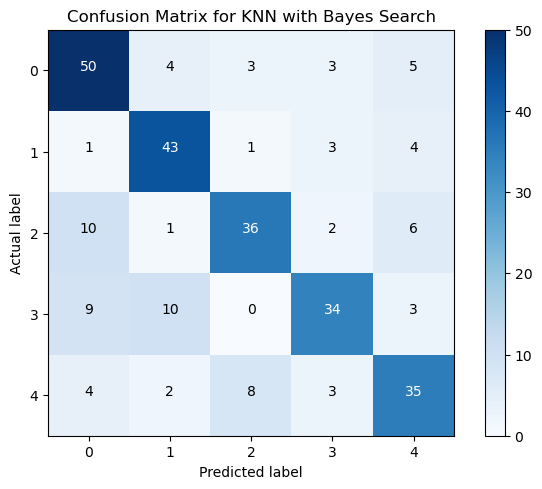

In [89]:
#plt.figure(figsize=(10, 7))
plt.imshow(cf_matrix_knn_bayes, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for KNN with Bayes Search')
plt.colorbar()

# Draw the grid boxes
class_names = ['0', '1', '2', '3', '4']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Draw the text boxes
thresh = cf_matrix_knn_bayes.max() / 2.
for i, j in itertools.product(range(cf_matrix_knn_bayes.shape[0]), range(cf_matrix_knn_bayes.shape[1])):
    plt.text(j, i, cf_matrix_knn_bayes[i, j],
             horizontalalignment="center",
             color="white" if cf_matrix_knn_bayes[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


From the confusion matrix it is possible to notice that the KNN with grid search predicted wrong 24 data points as class 0, 17 as class 1, 12 as class 2, 11 as class 3 and 18 data points as class 4. So the most probablematic were false 0 and false 4. But this makes sense also because class 0 and class 4 were the most represented classes in the dataset (it is important to notice that this is a very small difference but it was nice to be pointed out).

####
4.2.5 KNN MODEL SELECTION


In this section, I am going to evaluate the performance of the KNN models using different hyperparameter search methods: Grid Search, Random Search, and Bayesian Search.

I consider three key metrics (in addition to accuracy and confusion matrix already computed for each single method in the above steps):
- precision score that is the ratio between True positive and the sum of True Positive and False Positives (TP/(TP+FP));
- recall (also called sensitivity) that is the ratio between True Positives and the sum of True Positive and False Negative (TP/(TP+FN))
- f1-score that is the weighted average of the precision and recall score.

Moreover, since I had multiple classes as a labels (and not a binary situation) I used the average method 'macro' which gives the same importance to each class (this choice comes from the fact that the classes are well balanced and therefore was useless to give more importance to some specific class).

Finally, I generate classification reports for each search method to provide a detailed breakdown of the model's performance for each class.


In [90]:

average_method ='macro'
for score in (precision_score, recall_score, f1_score):
    sgrid_stat_knn = score(y_test, y_pred_best_k_grid, average=average_method)
    srandom_stat_knn = score(y_test, y_pred_best_random_knn, average=average_method)
    sbayes_stat_knn = score(y_test, y_pred_best_bayes_knn, average=average_method)
    print(score.__name__, (sgrid_stat_knn, srandom_stat_knn, sbayes_stat_knn))
    

precision_score (0.7116550512776928, 0.7116550512776928, 0.7116550512776928)
recall_score (0.7061838161838162, 0.7061838161838162, 0.7061838161838162)
f1_score (0.7052489445803459, 0.7052489445803459, 0.7052489445803459)


In [91]:
c_report_grid_knn = classification_report(y_test, y_pred_best_k_grid, target_names=['0', '1', '2', '3', '4'])
c_report_random_knn = classification_report(y_test, y_pred_best_random_knn, target_names=['0', '1', '2', '3', '4'])
c_report_bayes_knn = classification_report(y_test, y_pred_best_bayes_knn, target_names=['0', '1', '2', '3', '4'])
print(c_report_grid_knn, c_report_random_knn, c_report_bayes_knn)

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        65
           1       0.72      0.83      0.77        52
           2       0.75      0.65      0.70        55
           3       0.76      0.61      0.67        56
           4       0.66      0.67      0.67        52

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.71      0.71      0.71       280
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        65
           1       0.72      0.83      0.77        52
           2       0.75      0.65      0.70        55
           3       0.76      0.61      0.67        56
           4       0.66      0.67      0.67        52

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.71      0.71      0.71       280
               precisio

After evaluating the models, it is possible to observe that the K-Nearest Neighbors (KNN) classifier produced similar results across different hyperparameter search methods: Grid Search, Random Search, and Bayesian Search. This consistency suggests that the chosen parameter ranges and distributions are well-suited for the KNN model, allowing all three methods to effectively explore the hyperparameter space.

Unlike the Random Forest model, where additional parameters impact the model performance from one search to another, the KNN model primarily relies on the same few pivotal parameters (and this is the reason why I choose to keep always the same across all different search methods)  'n_neighbors', 'metric', 'weights' and the 'algorithm'.

These parameters are critical in determining the KNN model's performance, and thus, they were consistently included in the hyperparameter search space.

Despite the similar results, it's important to note that the KNN classifier's accuracy did not improve significantly beyond a certain point which in accuracy is approximately 71% (more precisely 70.71%).

Therefore to make the comparison with the random forest, I will choose just the KNN with grid search (since this method has explored all the possible combinations).

In particular the precise hyperparameters of KNN with grid search are:
- algorithm: auto
- metric: manhattan
- n_neighbors: 9
- weights: distance

###
4.3 FINAL MODEL SELECTION

In this section, I am going to compare the performance of the two best models got so far:  Random Forest using Bayes Search and KNN using  grid search.

Again as I did before I consider three key metrics (in addition to accuracy and confusion matrix already computed for each single method in the above steps):
- precision score;
- recall;
- f1-score.

Moreover, since I had multiple classes as a labels (and not a binary situation) I used the average method 'macro' which gives the same importance to each class (this choice comes from the fact that the classes are well balanced and therefore was useless to give more importance to some specific class).

Finally, I generate classification reports for the two models to provide a detailed breakdown of their performance for each class.

In [92]:
average_method ='macro'
for score in (precision_score, recall_score, f1_score):
    rf_final = score(y_test, y_pred_bayes, average=average_method)
    knn_final = score(y_test, y_pred_best_k_grid, average=average_method)
    print(score.__name__, (rf_final, knn_final))

precision_score (0.7336052824885823, 0.7116550512776928)
recall_score (0.72998001998002, 0.7061838161838162)
f1_score (0.730589691534106, 0.7052489445803459)


In [93]:
c_report_rf_final = classification_report(y_test, y_pred_bayes, target_names=['0', '1', '2', '3', '4'])
c_report_knn_final = classification_report(y_test, y_pred_best_k_grid, target_names=['0', '1', '2', '3', '4'])
print(c_report_rf_final, c_report_knn_final)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        65
           1       0.70      0.75      0.72        52
           2       0.78      0.76      0.77        55
           3       0.78      0.68      0.72        56
           4       0.70      0.67      0.69        52

    accuracy                           0.73       280
   macro avg       0.73      0.73      0.73       280
weighted avg       0.73      0.73      0.73       280
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        65
           1       0.72      0.83      0.77        52
           2       0.75      0.65      0.70        55
           3       0.76      0.61      0.67        56
           4       0.66      0.67      0.67        52

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.71      0.71      0.71       280



As it is s possible to notice the Random Forest with Bayes Search overcomes in every metrics the best KNN.
Therefore I chose this as the model to predict the final anonymous data.
Surely all the score and in particular the accuracy (approximately 73%) are not incredibly satisfying. 

###
4.4 NEURAL NETWORK (EXTRA TOPIC)

I now build a neural network, in order to see if this model can capture better the complexity of our dataset and improve the performance on the metrics (in particular on the accuracy).

For the structure, I chose to include: 
- a flatten layer to convert the input data into a one-dimensional array;
- five linear (fully connected) layers separated by Leaky ReLU activation functions. Leaky ReLU introduces non-linearity to the model and often performs better than the traditional ReLU function;
- dropout layers to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
- batchNormalization layers between linear layers to normalize the activations of the previous layer, improving the stability and performance of the model.
- a softmax function at the output layer to assign probabilities to each class, enabling multi-class classification.

For training I used:

- cross Entropy loss, which is well-suited for multi-class classification tasks.
- full batch training, meaning the entire dataset is used in each training iteration.
- a large number of epochs (10,000) after experimenting with 1,000 and 15,000 epochs. With 1,000 epochs, the accuracy was lower, while with 15,000 epochs, the model began to overfit.

In [94]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(25, 512),  # Input layer adjusted to 25 features
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(512, 256),  # Hidden layer
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            
            nn.Linear(256, 128),  # Hidden layer
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),  # Hidden layer
            nn.LeakyReLU(),
            
            nn.Linear(64, 5),  # Output layer adjusted to 5 classes
            nn.Softmax(dim=1)  # Softmax activation for multi-class classification
        )
    
    def forward(self, x):
        return self.model(x)

In [95]:
model_nn = NeuralNetwork()
print(model_nn)

NeuralNetwork(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=25, out_features=512, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Dropout(p=0.3, inplace=False)
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): LeakyReLU(negative_slope=0.01)
    (13): Linear(in_features=64, out_features=5, bias=True)
    (14): Softmax(dim=1)
  )
)


In [96]:
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train.values, y_train.values, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train_nn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_nn, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_nn, dtype=torch.long)  

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming model_DS_H is your NeuralNetworkDropSeq model

# Use CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss() 

# Use an optimizer (SGD in this case)
optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.01)

epochs = 10000
best_val_acc = 0
patience = 3
no_improve_epochs = 0

best_model_path_nn = 'best_model_final_nn.pth'

for epoch in range(epochs):
    model_nn.train()
    optimizer.zero_grad()  # Reset the gradients of all model parameters to zero.
    train_output = model_nn(X_train_tensor)  # Forward pass with all training data
    train_loss = criterion(train_output, y_train_tensor)  # Calculate the loss
    train_loss.backward()  # Compute the gradients of the loss with respect to the model's parameters
    optimizer.step()  # Update the weights
    
    # Calculate training accuracy
    with torch.no_grad():
        train_predictions = torch.argmax(train_output, dim=1)  # Get the predicted class indices
        train_correct = (train_predictions == y_train_tensor).sum().item()
        train_total = y_train_tensor.size(0)
        train_acc = train_correct / train_total

    # Validation
    model_nn.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_output = model_nn(X_val_tensor)  # Compute predictions on the validation dataset
        val_loss = criterion(val_output, y_val_tensor)
        val_predictions = torch.argmax(val_output, dim=1)  # Get the predicted class indices
        val_correct = (val_predictions == y_val_tensor).sum().item()
        val_total = y_val_tensor.size(0)
        val_acc = val_correct / val_total

    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, '
          f'Train Accuracy: {train_acc:.4f}, '
          f'Val Loss: {val_loss.item():.4f}, '
          f'Val Accuracy: {val_acc:.4f}')
    
   


Epoch 1/10000, Train Loss: 1.6105, Train Accuracy: 0.1853, Val Loss: 1.6100, Val Accuracy: 0.1741
Epoch 2/10000, Train Loss: 1.6095, Train Accuracy: 0.1920, Val Loss: 1.6100, Val Accuracy: 0.1741
Epoch 3/10000, Train Loss: 1.6107, Train Accuracy: 0.1942, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 4/10000, Train Loss: 1.6112, Train Accuracy: 0.1853, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 5/10000, Train Loss: 1.6106, Train Accuracy: 0.1875, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 6/10000, Train Loss: 1.6101, Train Accuracy: 0.1897, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 7/10000, Train Loss: 1.6094, Train Accuracy: 0.1998, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 8/10000, Train Loss: 1.6092, Train Accuracy: 0.2009, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 9/10000, Train Loss: 1.6088, Train Accuracy: 0.2042, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 10/10000, Train Loss: 1.6112, Train Accuracy: 0.1864, Val Loss: 1.6100, Val Accuracy: 0.1786
Epoch 11/10000, Tra

Epoch 511/10000, Train Loss: 1.6012, Train Accuracy: 0.2935, Val Loss: 1.6019, Val Accuracy: 0.2991
Epoch 512/10000, Train Loss: 1.6016, Train Accuracy: 0.2801, Val Loss: 1.6019, Val Accuracy: 0.2991
Epoch 513/10000, Train Loss: 1.6026, Train Accuracy: 0.2790, Val Loss: 1.6018, Val Accuracy: 0.2991
Epoch 514/10000, Train Loss: 1.6007, Train Accuracy: 0.2835, Val Loss: 1.6018, Val Accuracy: 0.2991
Epoch 515/10000, Train Loss: 1.6018, Train Accuracy: 0.2812, Val Loss: 1.6018, Val Accuracy: 0.2991
Epoch 516/10000, Train Loss: 1.6011, Train Accuracy: 0.2779, Val Loss: 1.6018, Val Accuracy: 0.2991
Epoch 517/10000, Train Loss: 1.6014, Train Accuracy: 0.2980, Val Loss: 1.6018, Val Accuracy: 0.2991
Epoch 518/10000, Train Loss: 1.6001, Train Accuracy: 0.3002, Val Loss: 1.6017, Val Accuracy: 0.2991
Epoch 519/10000, Train Loss: 1.6017, Train Accuracy: 0.2857, Val Loss: 1.6017, Val Accuracy: 0.2991
Epoch 520/10000, Train Loss: 1.6021, Train Accuracy: 0.2924, Val Loss: 1.6017, Val Accuracy: 0.2991


In [98]:
torch.save(model_nn.state_dict(), best_model_path_nn)

In [99]:
# Load the best model
model_nn.load_state_dict(torch.load(best_model_path_nn))

<All keys matched successfully>

In [100]:
# Evaluate on test data
model_nn.eval()
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Use long for class indices

with torch.no_grad():
    test_output = model_nn(X_test_tensor)
    test_loss = criterion(test_output, y_test_tensor)
    test_predictions = torch.argmax(test_output, dim=1)  # Get the predicted class indices
    test_correct = (test_predictions == y_test_tensor).sum().item()
    test_total = y_test_tensor.size(0)
    test_acc = test_correct / test_total

print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}')


Test Loss: 1.1447, Test Accuracy: 0.7500


The final test accuracy of the neural network is 75.00% which is better then the one of all the best models found so far (Random Forest with Bayesian Search and KNN with grid Search). However, neural networks models usually reach an higher accuracy. In this case, the relatively low accuracy could be primarily attributed to the dataset's limited size, consisting of only 1400 data points.


Given that the dataset was further split into training and testing sets (80% training and 20% testing), and then the training set was again split into 80% training and 20% validation, the neural network had even fewer data points to learn from. This limited data hindered the model's ability to fully learn the complex patterns and features within the dataset.

A potential solution to address this issue could be to implement a Boltzmann machine. After training the Boltzmann machine, it could generate new data points with the same probability distributions as the original dataset, thus providing a larger volume of data for training the neural network. However, due to time constraints and the fact that this approach is beyond the scope of the current project, this possibility will not be explored further.


##
5. PREDICTIONS

Now I am going to predict the class of the anonymous data points provided by the professor

In [101]:
anonymous_data = pd.read_csv('mldata_0003195463/mldata_0003195463.TEST_FEATURES.csv', index_col=0)
anonymous_data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
id                                                                       
0     -1.583901   0.066270   0.462274  -0.175453  -0.122860  -2.964932   
1      0.741998   0.842662  -0.580674   1.177410  -1.590579  -0.992677   
2     -2.690293  -1.274130   3.564006   0.840850  -1.267567  -0.168341   
3     -1.449382   1.068814  -3.820457  -0.836199  -1.242546  -1.803914   
4     -0.001136   4.266773   0.390607  -0.230595   0.055867  -0.388356   
...         ...        ...        ...        ...        ...        ...   
1395   3.051612   5.335903  -0.780311  -1.206728   6.041506  -2.462116   
1396  -0.818027   0.131502  -3.361555   0.574756  -1.395142  -2.137571   
1397   1.300382   4.959589  -0.821422   0.048367  -1.133989   2.583393   
1398  -3.811468  -0.570010   0.967775  -0.904938  -2.729183  -3.508922   
1399   2.115240   3.851803  -0.699010  -1.335313  -0.850509   0.122552   

      feature_7  feature_8  feature_9  feature_10  ...  feature_16  \
id                                                 ...               
0     -1.128756  -1.583901  -0.837369   -1.541634  ...    2.058315   
1      1.202091   0.741998   0.397817    0.878938  ...   -2.693609   
2      2.832282  -2.690293  -2.031966    1.289001  ...    5.708247   
3      0.858350  -1.449382  -3.473241    1.331370  ...    1.037856   
4      0.298274  -0.001136   2.720829    0.960466  ...   -1.661571   
...         ...        ...        ...         ...  ...         ...   
1395  -0.099222   3.051612  -0.541221    0.031599  ...   -2.389265   
1396   2.059778  -0.818027   4.986959    0.337357  ...    2.695408   
1397   3.246328   1.300382   1.914509    0.360079  ...    0.811838   
1398   0.989772  -3.811468  -2.331983    1.343327  ...   -1.978188   
1399   1.786011   2.115240   0.213781   -1.410630  ...   -1.658974   

      feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  \
id                                                                             
0       1.987120    0.875662    0.490501   -0.564009   -0.473025   -3.121843   
1       2.358702   -0.448296    1.258434   -0.929838    0.551937    1.675974   
2      -1.422307    0.561772    5.098278    2.644700   -0.522982    0.559692   
3      -3.569374    0.000523    4.939084   -2.669314   -0.229439   -1.235043   
4       2.500116    0.314138    2.876392    0.793374    0.016719   -1.138375   
...          ...         ...         ...         ...         ...         ...   
1395   -1.532996    0.165623   -0.557866    2.452305   -1.016575   -0.347464   
1396   -2.043497    0.417200    4.119033   -1.835029   -1.014946    0.459286   
1397    4.422174   -1.072638    4.729813   -2.414941    1.112228    0.541504   
1398    0.218630    0.657534    6.934419    1.609578   -1.178043   -0.004904   
1399    1.958692    0.723056    6.628800   -1.487204    0.189379   -0.214925   

      feature_23  feature_24  feature_25  
id                                        
0      -3.204708    4.059989   -1.230859  
1       2.500228   -1.905566    0.004239  
2      -2.000696    2.440799    0.144461  
3      -2.255308    4.259756    0.219297  
4       0.867594    0.588746    1.752658  
...          ...         ...         ...  
1395   -4.107339    4.148608   -0.819975  
1396    0.252998   -5.875338   -0.483199  
1397    1.608467   -0.122532    0.698078  
1398    3.420006    1.526097   -0.750451  
1399    1.151181    5.037282    1.696641  

[1400 rows x 25 columns]

As anticipated before I am now going to predict the class of the anonymous data using the best model, the Random Forest classifier whose hyperparameters have been set with the Bayesian Search.
Moreover I will also compare these predictions with the one made by the KNN (the one whose hyperparameters have been established by the Grid Search) in order to find similarities.

In [103]:
final_an_predictions = best_rf_bayes.predict(anonymous_data)

In [104]:
# check the predictions respect the format, etc
final_an_predictions, len(final_an_predictions), set(final_an_predictions)

(array([0, 1, 0, ..., 1, 0, 1]), 1400, {0, 1, 2, 3, 4})

In [105]:
# let try now with the KNN best model to see how many similar predictions we get
final_an_predictions_knn = best_knn_grid.predict(anonymous_data)

In [106]:
final_an_predictions_knn, len(final_an_predictions_knn), set(final_an_predictions_knn)

(array([0, 1, 0, ..., 1, 0, 1]), 1400, {0, 1, 2, 3, 4})

In [107]:
k=0
for i in range(1400):
    if final_an_predictions[i]!=final_an_predictions_knn[i]:
        k=k+1
print("RF VS KNN", "\nnumber errors: ", k, "\npercentage correspondance: ", (1400-k)/1400)

RF VS KNN 
number errors:  317 
percentage correspondance:  0.7735714285714286


It is possible to notice that the correspondece between RF and KNN is of 77%, that potentially could also represent the percentages of right predictions (I still don't know on the different predictions which model is right).

Finally I save the prediction (I will send the predictions made by the random forest for the reasons explain in the former section, Final Model Evaluation) on a separate file.

In [109]:
np.savetxt('test_predictions_Federico_Pezzoli_ML_Project.txt', final_an_predictions, fmt='%d')

##
6. CONCLUSIONS

In this project, the primary goal was to compare the performance of the k-Nearest Neighbors (KNN) algorithm with that of a Random Forest classifier on the given dataset. Additionally, I carried out an exploratory data analysis, the use of pca  and implementation of a Neural Network to further understand the dataset and explore if a more complex model could improve the performance.


KEY FINDINGS:
- The best model found (excluded the Neural Network which was an extra topic) was the Random Forest classifier with Bayesian Search (for details about the parameters go to the section Model Selection), achieving an accuracy of 73%. 
This performance is not incredibly satisfying and this is probably caused by the fact  that the data in this case is not easily separable leading to overfitting and higher test error.
- the KNN  classifier instead performed consistently across different hyperparameter tuning methods, with the best accuracy being around 71% (lower then the one mentioned above). KNN has the advantage of being a non-parametric method, meaning it does not make specific assumptions about the data's distribution and shape.  However, here  KNN seems to be too simple to capture the underlying patterns in the data and correctly classify it.


CHALLENGES AND FUTURE POSSIBLE IMPROVEMENTS:
- the dataset was not particular large since it just contained 1400 data points making difficult to train appropriately more complex models as neural networks.
- In the KNN an additional scaling of the data did not significantly impact it; this was unexpected and suggests that other factors might be influencing the model's performance (additional scaling steps, using for example Standard Scaler or MinMax scaler have not been reported here given the length of the report and the useless impact they had, but they are mentioned to give a broader view of the context).
- additional hyperparameter tuning and model optimization techniques could be applied to improve the performance of the models. For example, testing a broader range of values for cross-validation folds or other hyperparameters could yield better results (in our case for example I mainly limited my work to values of cross validation between 3 and 6 given the time and computational constraints).
- other ML models like SVM with non-linear kernels or other ensemble learning methods as gradient Boosting (usually more powerful then RF) could be implemented.
